In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1, rc={'figure.figsize':(8,6)})


In [2]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = 'your_subscription_id'
resource_group = 'ttds_fp_rg'
workspace_name = 'ttds_fp'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='summer_products_sale')
sales_df = dataset.to_pandas_dataframe()

In [3]:
# filename = 'summer-products-with-rating-and-performance_2020-08.csv'
# azureml://subscriptions/43c93cf1-3927-4afb-b10a-d6ae7218a61c/resourcegroups/ttds_fp_rg/workspaces/ttds_fp/datastores/workspaceblobstore/paths/UI/2022-12-18_122321_UTC
# filename = 'archive/summer-products-with-rating-and-performance_2020-08.csv'
# filename = 'project-data.csv'
# sales_df = pd.read_csv(filename)
sales_df.shape

(1575, 43)

## Data Description

[Original Source](https://www.kaggle.com/datasets/jmmvutu/summer-products-and-sales-in-ecommerce-wish)

The data comes from the Wish platform. This dataset contains product listings as well as products ratings and sales performance. The columns are described as follows:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
|title                          |character | Title for localized for european countries. May be the same as title_orig if the seller did not offer a translation. |
|title_orig                     |character | Original english title of the product. |
|price                          |double    | Price you would pay to get the product. |
|retail_price                   |double    | Reference price for similar articles on the market, or in other stores/places. Used by the seller to indicate a regular value or the price before discount. |
|currency_buyer                 |character | Currency of the prices. |
|units_sold                     |double    | Number of units sold. Lower bound approximation by steps. |
|uses_ad_boosts                 |double    | Whether the seller paid to boost his product within the platform (highlighting, better placement). |
|rating                         |double    | Mean product rating. |
|rating_count                   |double    | Total number of ratings of the product. |
|rating_five_count              |double    | Number of 5-star ratings. |
|rating_four_count              |double    | Number of 4-star ratings. |
|rating_three_count             |double    | Number of 3-star ratings. |
|rating_two_count               |double    | Number of 2-star ratings. |
|rating_one_count               |double    | Number of 1-star ratings. |
|badges_count                   |double    | Number of badges the product or the seller have. |
|badge_local_product            |double | A badge that denotes the product is a local product. Conditions may vary (being produced locally, or something else). Some people may prefer buying local products rather than. 1 means Yes, has the badge. |
|badge_product_quality          |double    | Badge awarded when many buyers consistently gave good evaluations 1 means Yes, has the badge. |
|badge_fast_shipping            |double    | Badge awarded when this product's order is consistently shipped rapidly. |
|tags                           |character    | Tags set by the seller. |
|product_color                  |character | Product's main color. |
|product_variation_size_id      |character | One of the available size variation for this product. |
|product_variation_inventory    |double    | Inventory the seller has. Max allowed quantity is 50. |
|shipping_option_name           |character | Options for the type of shipping. |
|shipping_option_price          |double    | Shipping price. |
|shipping_is_express            |double    | Whether the shipping is express or not. 1 for True. |
|countries_shipped_to           |double    | Number of countries this product is shipped to. Sellers may choose to limit where they ship a product to. |
|inventory_total                |double    | Total inventory for all the product's variations (size/color variations for instance). |
|has_urgency_banner             |double    | Whether there was an urgency banner with an urgency. |
|urgency_text                   |character    | A text banner that appear over some products in the search results. |
|origin_country                 |character    | Country of origin from where the product was imported. |
|merchant_title                 |character | Merchant's displayed name (show in the UI as the seller's shop name). |
|merchant_name                  |character    | Merchant's canonical name. A name not shown publicly. Used by the website under the hood as a canonical name. Easier to process since all lowercase without white space. |
|merchant_info_subtitle         |character    | The subtitle text as shown on a seller's info section to the user. (raw, not preprocessed). The website shows this to the user to give an overview of the seller's stats to the user. Mostly consists of '% <positive_feedbacks> (<rating_count> reviews)' written in french. |
|merchant_rating_count          |double    | Number of ratings of this seller. |
|merchant_rating                |double    | Merchant's rating. |
|merchant_id                    |character | Merchant unique id|
|merchant_has_profile_picture   |double    | Convenience boolean that says whether there is a 'merchant_profile_picture' url. |
|merchant_profile_picture       |character | Custom profile picture of the seller (if the seller has one). Empty otherwise. |
|product_url                    |character | URL to the product page. You may need to login to access it |
|product_picture                |character    | Pictures of the products. |
|product_id                     |character    | Product identifier. You can use this key to remove duplicate entries if you're not interested in studying them. |
|theme                          |character | The search term used in the search bar of the website to get these search results. |
|crawl_month                    |character    | Month this information was obtained from the Wish website. |



# Data Visualization

In [4]:
missing_val = sales_df.isna().sum()
missing_val[missing_val > 0]


title_orig                         2
price                              3
retail_price                       3
currency_buyer                     2
units_sold                         3
uses_ad_boosts                     3
rating                             3
rating_count                       3
rating_five_count                 48
rating_four_count                 48
rating_three_count                48
rating_two_count                  48
rating_one_count                  48
badges_count                       3
badge_local_product                3
badge_product_quality              3
badge_fast_shipping                3
tags                               2
product_color                     43
product_variation_size_id         16
product_variation_inventory        2
shipping_option_name               2
shipping_option_price              2
shipping_is_express                2
countries_shipped_to               3
inventory_total                    3
has_urgency_banner              1102
u

## Correlation With Target Variable

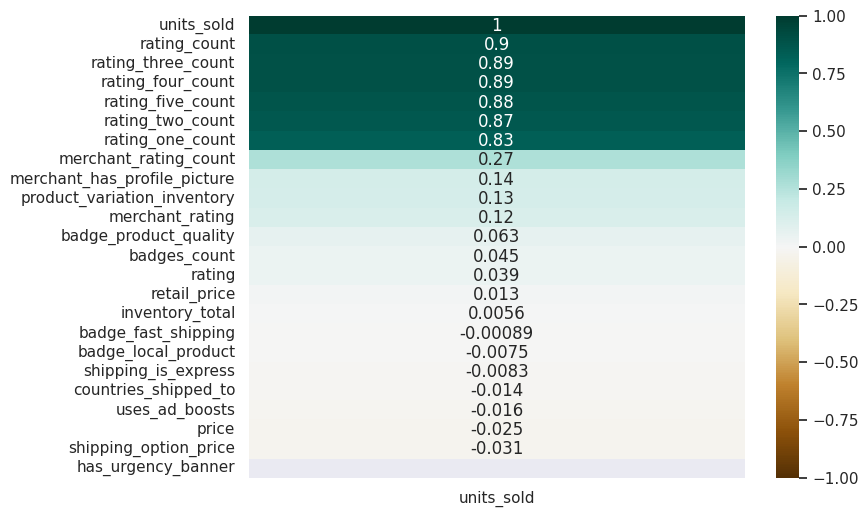

In [5]:
corr_vals = sales_df.corr()['units_sold'].sort_values(ascending=False).to_frame()
sns.heatmap(corr_vals, annot=True,vmin=-1, vmax=1, cmap='BrBG')

## Origin Country

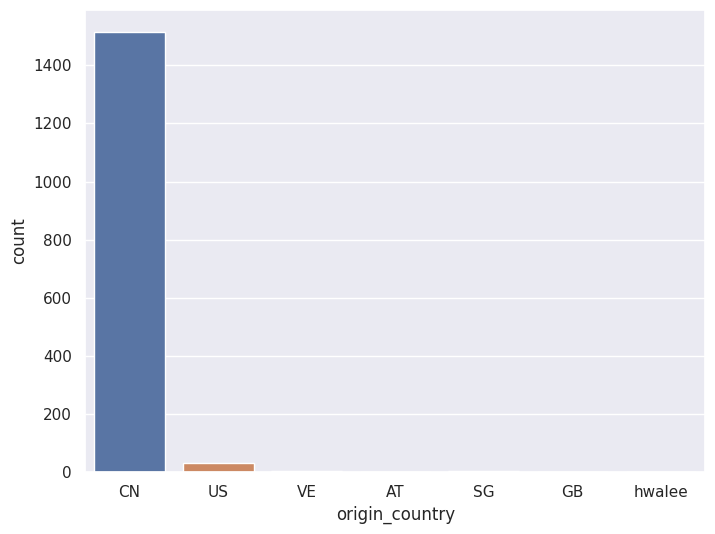

In [6]:
sns.countplot(x=sales_df['origin_country'])

China and US are most popular origin country we will replace other countries with "other"

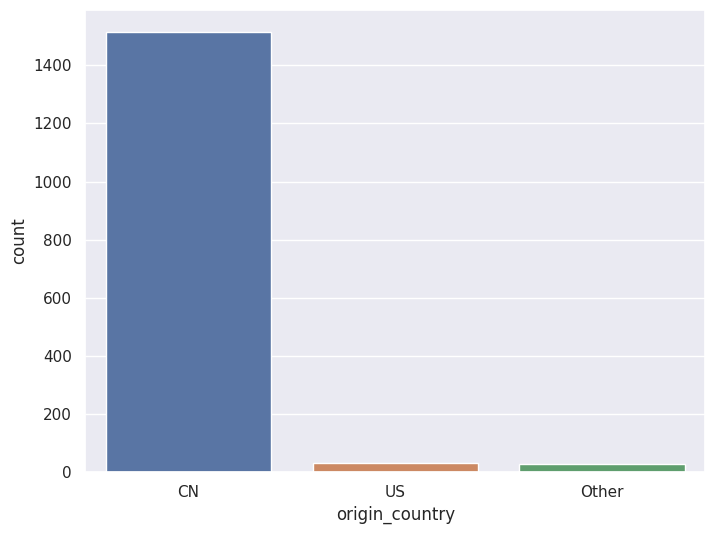

In [7]:
def changeCountry(x):
    if x in ["CN","US"]:
        return x
    return "Other"

sales_df['origin_country'] = sales_df['origin_country'].map(lambda x: changeCountry(x))
sns.countplot(x=sales_df['origin_country'])

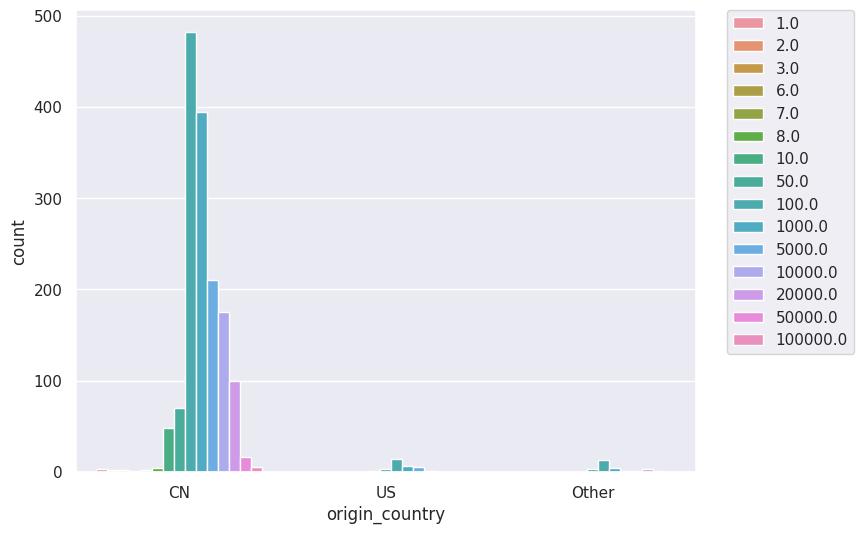

In [8]:
sns.countplot(x=sales_df['origin_country'],hue=sales_df['units_sold'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

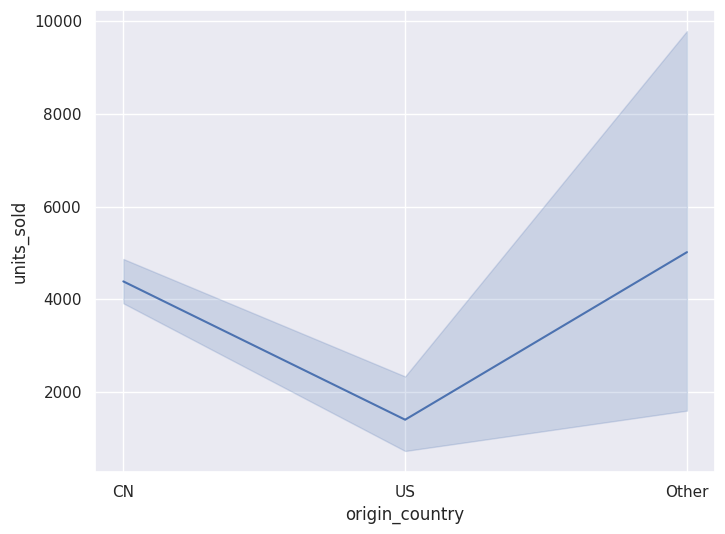

In [9]:
sns.lineplot(x=sales_df['origin_country'], y=sales_df['units_sold'])

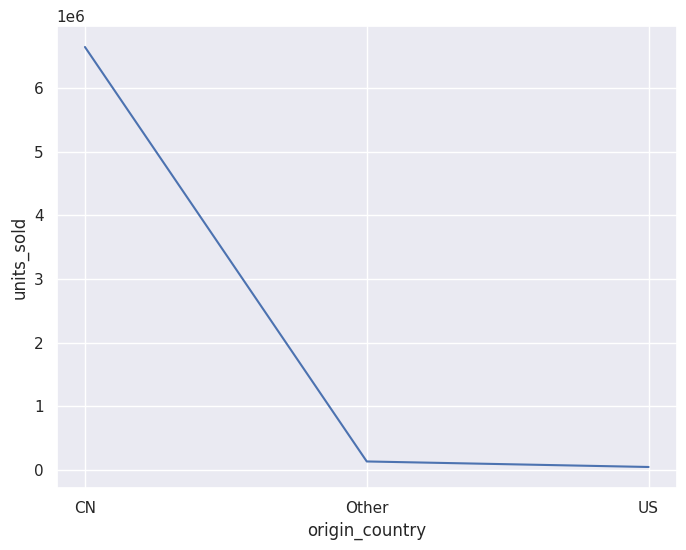

In [10]:
col_df = sales_df.groupby('origin_country').agg('sum', numeric_only = True)['units_sold'].to_frame()
col_df.reset_index(level=0, inplace=True)

sns.lineplot(x="origin_country", y="units_sold",
             data=col_df)

## Size Analysis

In [11]:
unique_sizes = sales_df['product_variation_size_id'].unique()
len(unique_sizes)

108

In [12]:
prod_size_counts = sales_df['product_variation_size_id'].value_counts()
prod_size_counts[prod_size_counts > 1]

S               641
XS              356
M               199
XXS             100
L                49
S.               18
XL               17
XXL              15
XXXS              6
XS.               5
s                 5
Size S            5
4XL               5
Size-XS           4
2XL               4
M.                4
SIZE XS           4
SizeL             3
Size-S            3
34                3
33                3
10 ml             3
2pcs              3
Suit-S            2
5XL               2
XXXXL             2
EU 35             2
Size4XL           2
25                2
S(bust 88cm)      2
35                2
3XL               2
One Size          2
29                2
XXXXXL            2
SIZE-XXS          2
1                 2
Size S.           2
Size -XXS         2
Size M            2
1 pc.             2
S Pink            2
size S            2
Name: product_variation_size_id, dtype: int64

In [13]:
# We will reduce the sizes from 107 to 7 categories
sizes_dic = {
    "XXS": ["Size -XXS","SIZE-XXS","XXXS"],
    "XS": ["XS.","Size-XS","SIZE XS"],
    "S": ["S.","Size S","Size-S","size S","Size S.","s","S(bust 88cm)","S Pink",],
    "M": ["M.","Size M"],
    "L": ["SizeL",],
    "XL": ["XXL","Size4XL","5XL","4XL","3XL","2XL","XXXXXL"]
}
color_key_val = {}
for k,v in sizes_dic.items():
    for tv in v:
        color_key_val[tv] = k
print(color_key_val)

{'Size -XXS': 'XXS', 'SIZE-XXS': 'XXS', 'XXXS': 'XXS', 'XS.': 'XS', 'Size-XS': 'XS', 'SIZE XS': 'XS', 'S.': 'S', 'Size S': 'S', 'Size-S': 'S', 'size S': 'S', 'Size S.': 'S', 's': 'S', 'S(bust 88cm)': 'S', 'S Pink': 'S', 'M.': 'M', 'Size M': 'M', 'SizeL': 'L', 'XXL': 'XL', 'Size4XL': 'XL', '5XL': 'XL', '4XL': 'XL', '3XL': 'XL', '2XL': 'XL', 'XXXXXL': 'XL'}


In [14]:
# Replace redundent sizes
def changeSize(x):
    if x in color_key_val.keys():
        return color_key_val[x]
    elif x in sizes_dic.keys():
        return x
    return "Other"
    
sales_df['product_variation_size_id'] = sales_df['product_variation_size_id'].map(lambda x : changeSize(x))

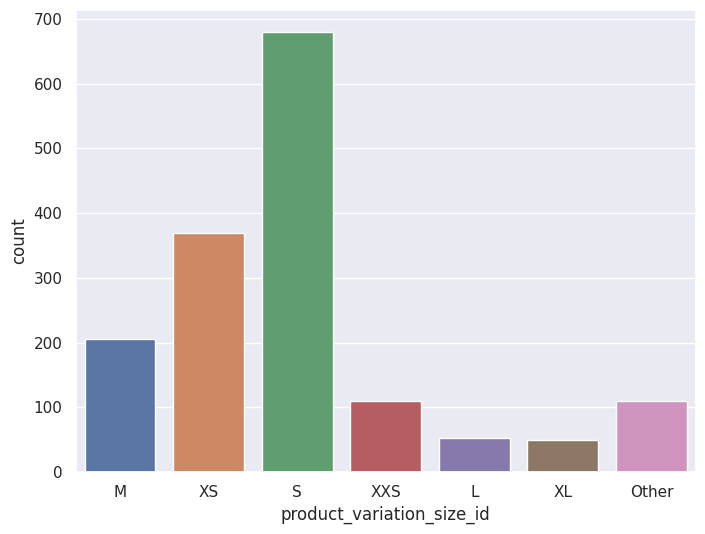

In [15]:
sns.countplot(x=sales_df['product_variation_size_id'])

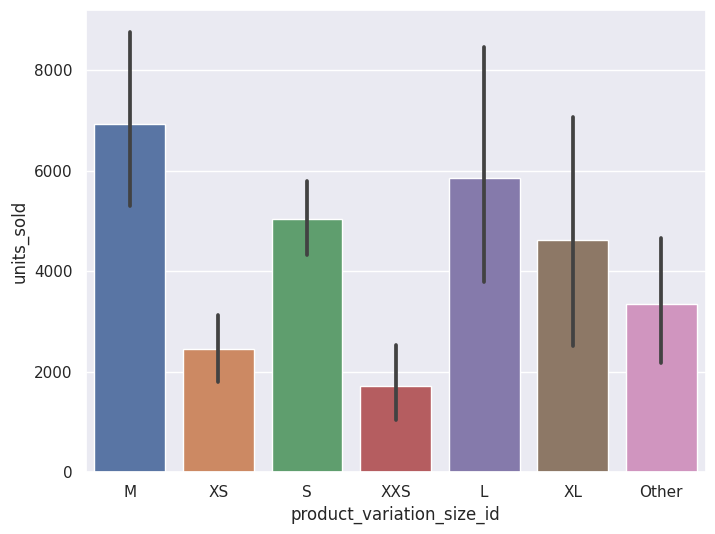

In [16]:
sns.barplot(x="product_variation_size_id", y="units_sold", data=sales_df)

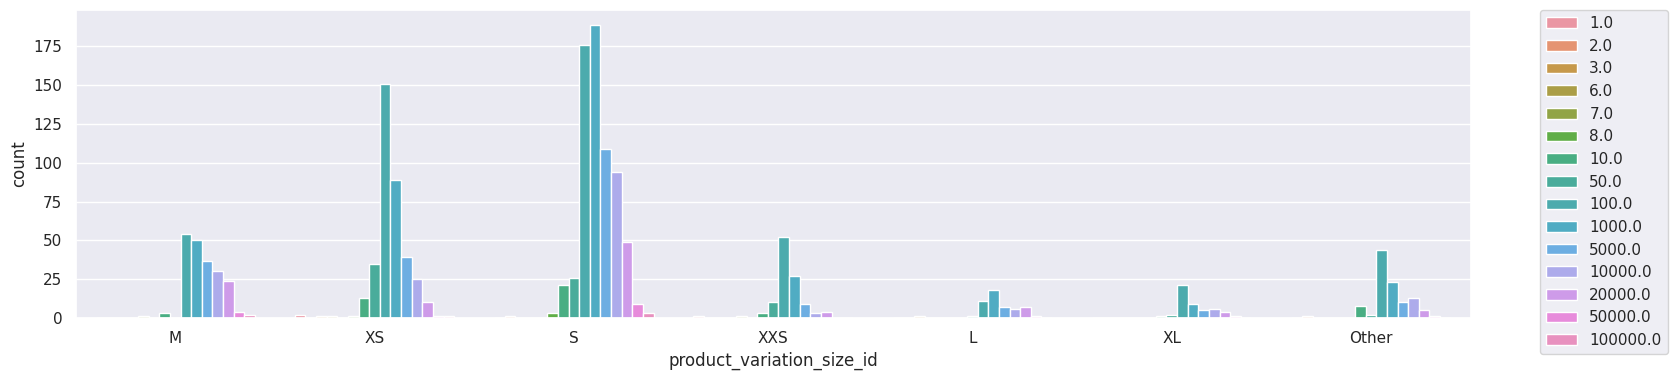

In [17]:
plt.figure(figsize=(18,4))
sns.countplot(x=sales_df['product_variation_size_id'],hue=sales_df['units_sold'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Color Analysis

In [18]:
unique_colors = sales_df['product_color'].unique()
print(unique_colors)

['white' 'green' 'leopardprint' 'black' 'yellow' 'navyblue' 'blue' 'beige'
 'grey' 'lightblue' 'orange' 'red' 'Black' 'armygreen' None 'pink' 'khaki'
 'red & blue' 'blue & pink' 'RED' 'white & green' 'winered'
 'black & green' 'purple' 'whitefloral' 'floral' 'fluorescentgreen'
 'orange & camouflage' 'lightyellow' 'coolblack' 'multicolor' 'camouflage'
 'lightpink' 'pink & black' 'silver' 'Army green' 'lightgreen' 'mintgreen'
 'pink & grey' 'gray' 'coffee' 'rose' 'light green' 'leopard'
 'black & white' 'orange-red' 'dustypink' 'White' 'star' 'white & black'
 'apricot' 'skyblue' 'burgundy' 'claret' 'pink & white' 'rosered' 'tan'
 'navy blue' 'wine red' 'lightred' 'Pink' 'coralred' 'brown' 'lakeblue'
 'darkblue' 'camel' 'pink & blue' 'nude' 'Blue' 'lightpurple' 'army'
 'black & stripe' 'Rose red' 'greysnakeskinprint' 'denimblue' 'applegreen'
 'offwhite' 'lightgray' 'navy' 'gray & white' 'brown & yellow'
 'winered & yellow' 'army green' 'whitestripe' 'rainbow' 'lightgrey'
 'watermelonred' 

In [19]:
prod_color_counts = sales_df['product_color'].value_counts()
print(prod_color_counts[prod_color_counts > 2])

black               302
white               254
yellow              105
pink                 99
blue                 98
red                  93
green                90
grey                 71
purple               53
armygreen            31
navyblue             28
winered              28
orange               27
multicolor           20
beige                14
lightblue            12
khaki                12
gray                 11
white & green        10
skyblue               8
rosered               8
brown                 7
coffee                7
darkblue              6
rose                  5
floral                5
fluorescentgreen      4
navy                  4
lightpink             4
leopard               4
black & green         4
White                 3
lightgreen            3
orange-red            3
camouflage            3
Black                 3
black & white         3
Name: product_color, dtype: int64


In [20]:
colors_dic = {
    "black": ["Black","coolblack"],
    "white": ["White","whitefloral","silver","offwhite",'army green', 'whitestripe'],
    "yellow": ['lightyellow'],
    "blue": ["navyblue","lightblue","skyblue","darkblue","navyblue","navy","navy blue","lakeblue","denimblue",'prussianblue'],
    "pink": ["lightpink","dustypink","Pink"],
    "red": ["winered","resered","rose","RED","claret","rosered","wine red","lightred","coralred","Rose red"],
    "green": ["lightgreen","armygreen","fluorescentgreen","Army green","mintgreen","light green","applegreen","darkgreen"],
    "grey": ["gray","lightgray",'lightgrey'],
    "brown": ["coffee","beige","khaki","tan","camel","nude"],
    "orange": ["apricot","orange-red"],
    "purple": ["burgundy","lightpurple","violet"],
    "dual": ["white & green","black & green","black & white","red & blue","blue & pink","orange & camouflage","pink & black","pink & grey","white & black","pink & white","pink & blue","black & stripe","gray & white","brown & yellow","winered & yellow","navyblue & white","white & red","black & yellow","black & blue"],
}

color_key_val = {}
for k,v in colors_dic.items():
    for tv in v:
        color_key_val[tv] = k
print(color_key_val)

{'Black': 'black', 'coolblack': 'black', 'White': 'white', 'whitefloral': 'white', 'silver': 'white', 'offwhite': 'white', 'army green': 'white', 'whitestripe': 'white', 'lightyellow': 'yellow', 'navyblue': 'blue', 'lightblue': 'blue', 'skyblue': 'blue', 'darkblue': 'blue', 'navy': 'blue', 'navy blue': 'blue', 'lakeblue': 'blue', 'denimblue': 'blue', 'prussianblue': 'blue', 'lightpink': 'pink', 'dustypink': 'pink', 'Pink': 'pink', 'winered': 'red', 'resered': 'red', 'rose': 'red', 'RED': 'red', 'claret': 'red', 'rosered': 'red', 'wine red': 'red', 'lightred': 'red', 'coralred': 'red', 'Rose red': 'red', 'lightgreen': 'green', 'armygreen': 'green', 'fluorescentgreen': 'green', 'Army green': 'green', 'mintgreen': 'green', 'light green': 'green', 'applegreen': 'green', 'darkgreen': 'green', 'gray': 'grey', 'lightgray': 'grey', 'lightgrey': 'grey', 'coffee': 'brown', 'beige': 'brown', 'khaki': 'brown', 'tan': 'brown', 'camel': 'brown', 'nude': 'brown', 'apricot': 'orange', 'orange-red': 'o

In [21]:
def changeColor(x):
    if x in color_key_val.keys():
        return color_key_val[x]
    elif x in colors_dic.keys():
        return x
    return "other"
    
sales_df['product_color'] = sales_df['product_color'].map(lambda x : changeColor(x))


In [22]:
sales_df['product_color'].unique()

array(['white', 'green', 'other', 'black', 'yellow', 'blue', 'brown',
       'grey', 'orange', 'red', 'pink', 'dual', 'purple'], dtype=object)

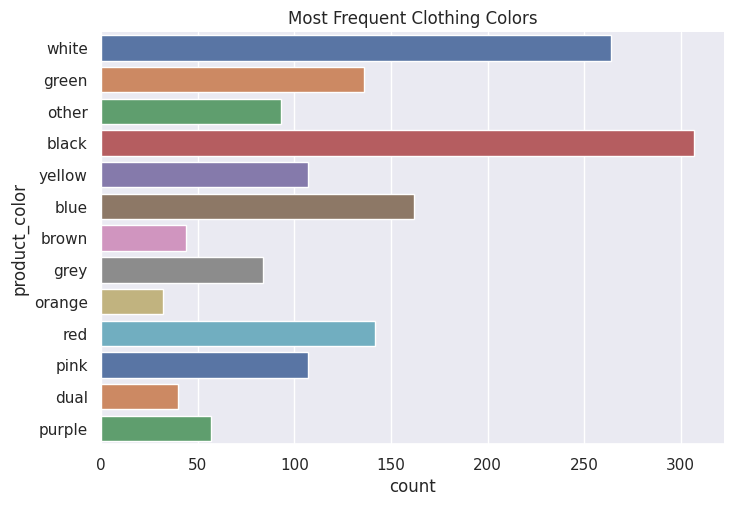

In [23]:
sns.catplot(y = 'product_color',data=sales_df, aspect=1.5,
            height = 5,kind="count", palette = "deep").set(title = "Most Frequent Clothing Colors")


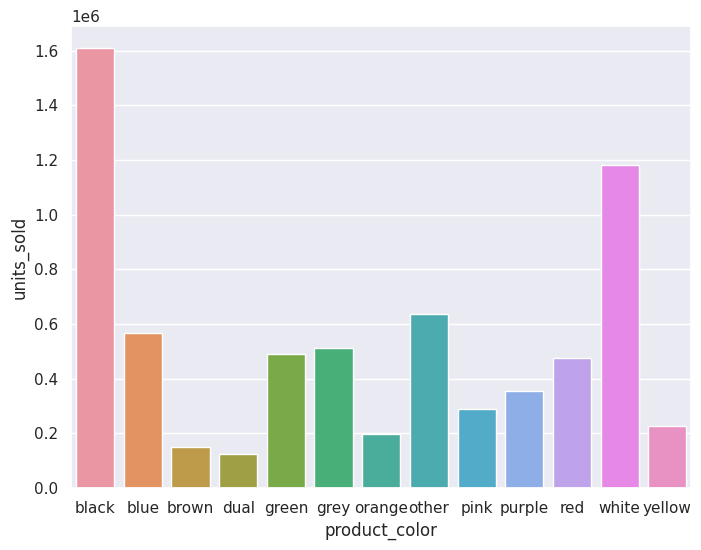

In [24]:
col_df = sales_df.groupby('product_color').agg('sum', numeric_only = True)['units_sold'].to_frame()
col_df.reset_index(level=0, inplace=True)
sns.barplot(x="product_color", y="units_sold", data=col_df)

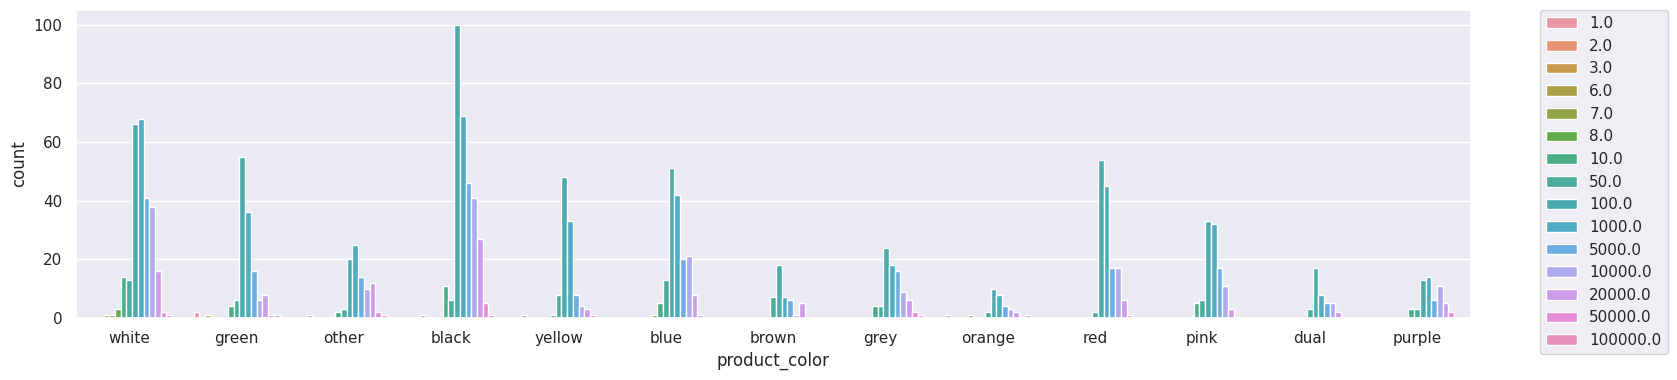

In [25]:
plt.figure(figsize=(18,4))
sns.countplot(x=sales_df['product_color'],hue=sales_df['units_sold'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Rating Analysis

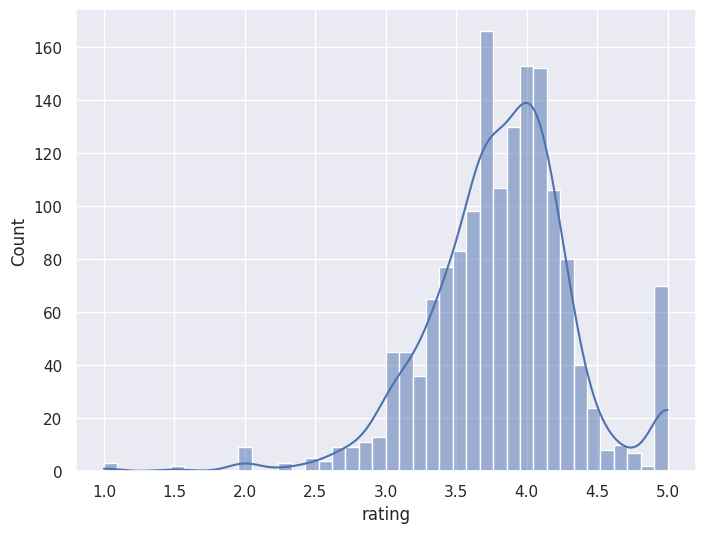

In [26]:
# sns.countplot(sales_df['rating'])
sns.histplot(sales_df['rating'],kde=True)

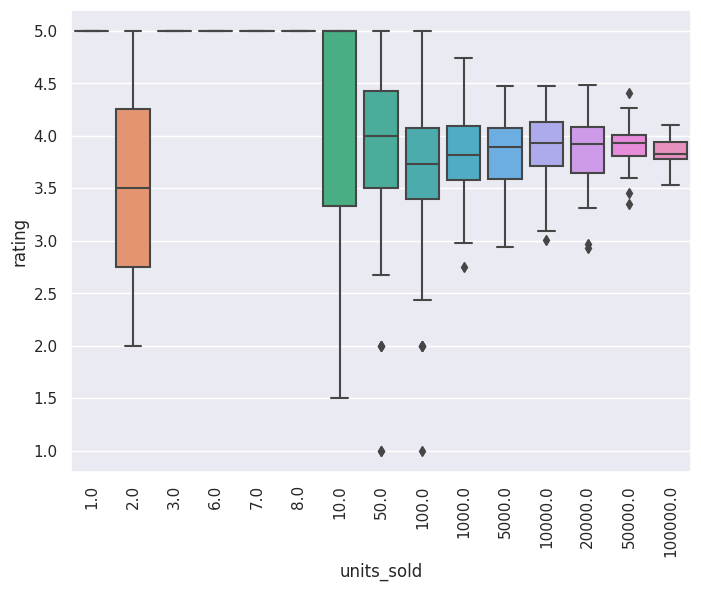

In [27]:
sns.boxplot(x=sales_df['units_sold'],y=sales_df['rating'])
plt.xticks(rotation=90, ha='center')
None


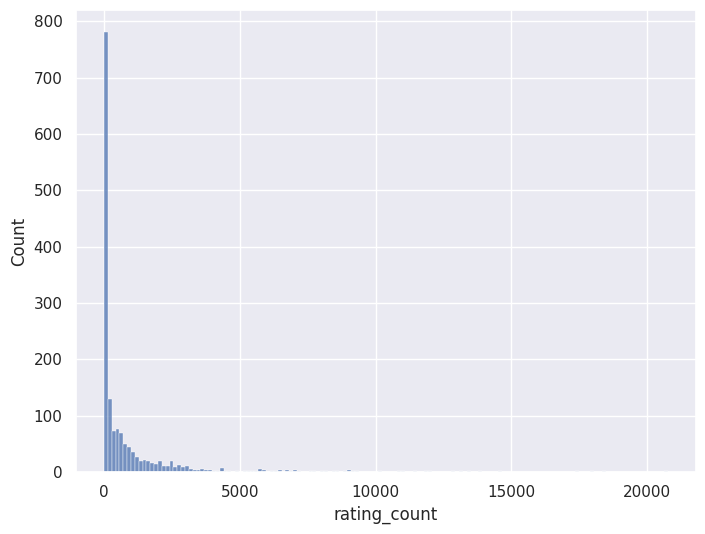

In [28]:
sns.histplot(sales_df['rating_count'])

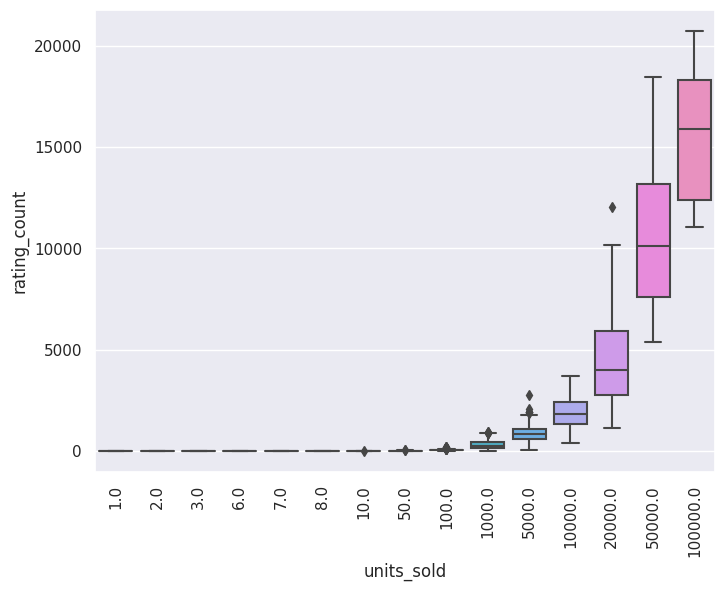

In [29]:
sns.boxplot(x=sales_df['units_sold'],y=sales_df['rating_count'])
plt.xticks(rotation=90, ha='center')
None


## Units Sold

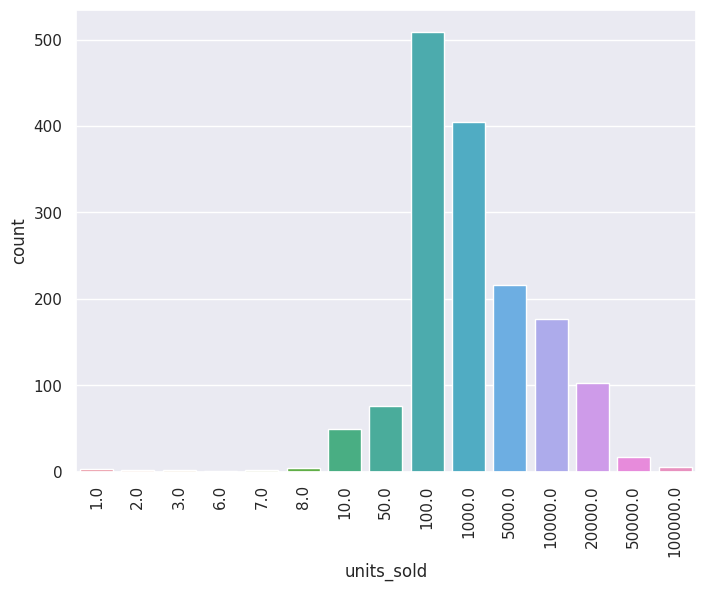

In [30]:
sns.countplot(x=sales_df['units_sold'])
plt.xticks(rotation=90, ha='center')
None

## Price Analysis

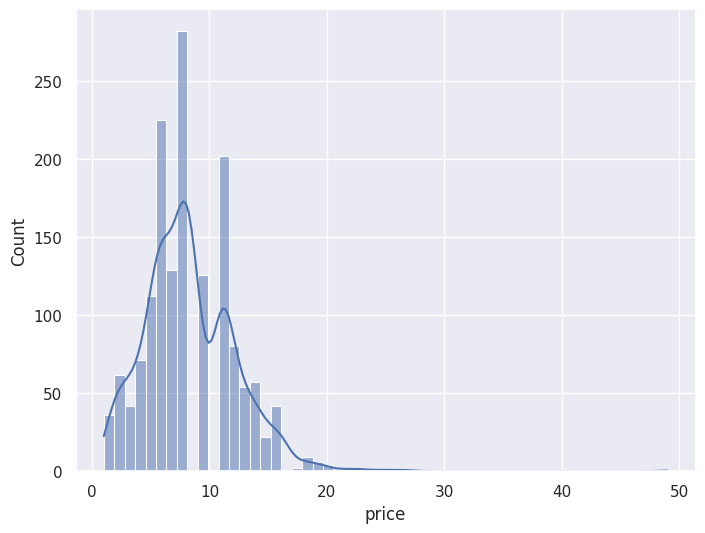

In [31]:
sns.histplot(x=sales_df['price'],kde=True)

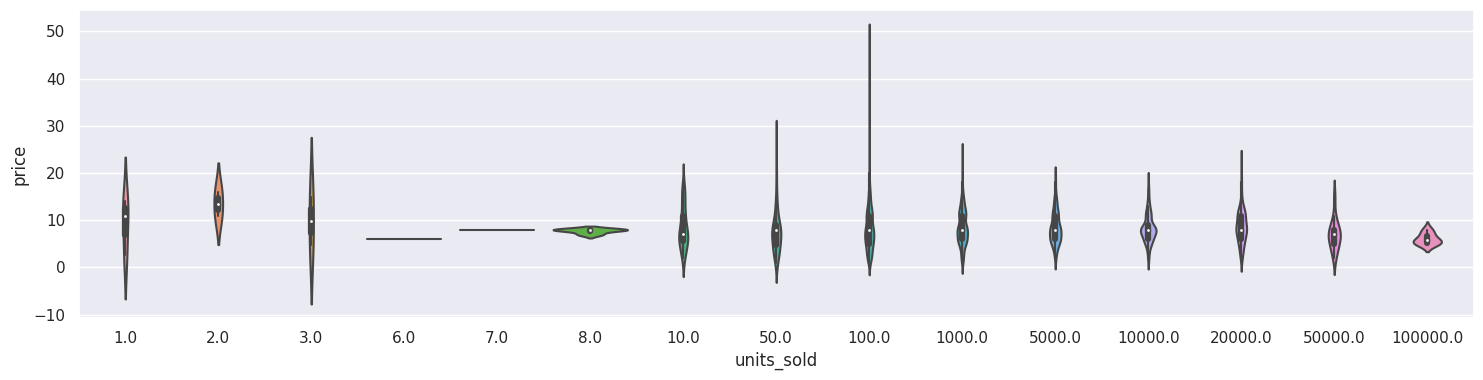

In [32]:
plt.figure(figsize=(18,4))
sns.violinplot(x=sales_df['units_sold'], y=sales_df['price'])

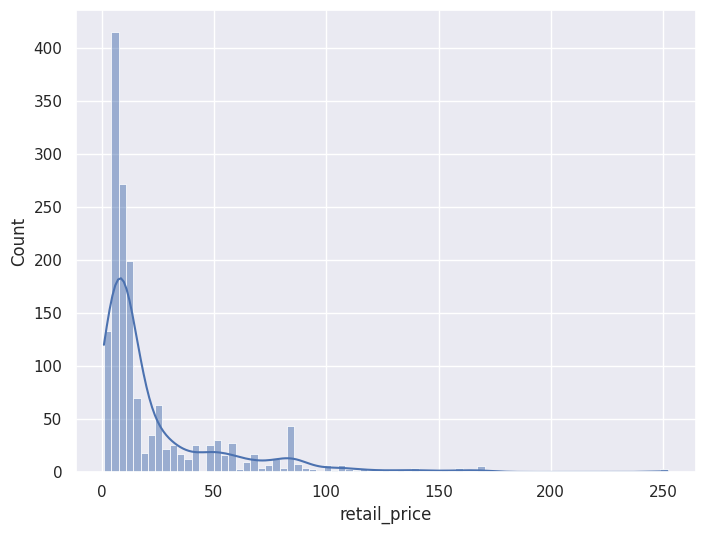

In [33]:
sns.histplot(x=sales_df['retail_price'],kde=True)

Retail Price is right skewed

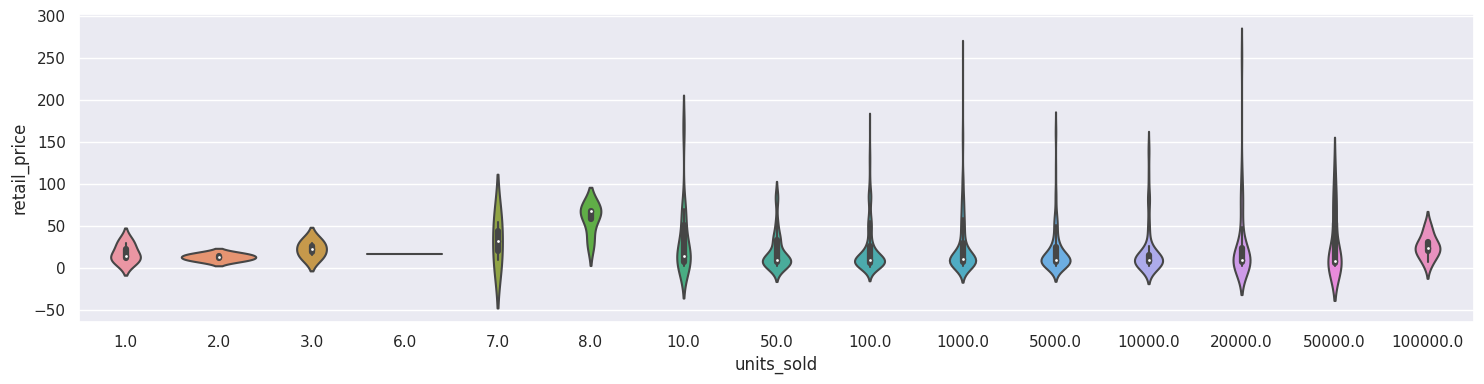

In [34]:
plt.figure(figsize=(18,4))
sns.violinplot(x=sales_df['units_sold'], y=sales_df['retail_price'])

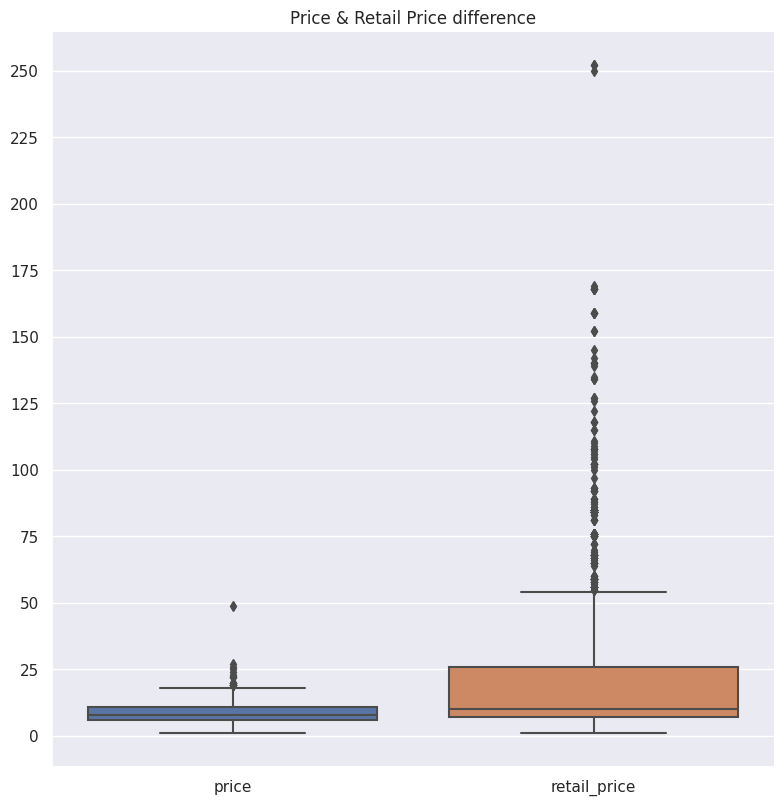

In [35]:
sns.catplot(data=sales_df[["price","retail_price"]], aspect=1, height = 8,
            kind="box", palette="deep").set(title = "Price & Retail Price difference",yticks =np.arange(0,sales_df["retail_price"].max(),25))

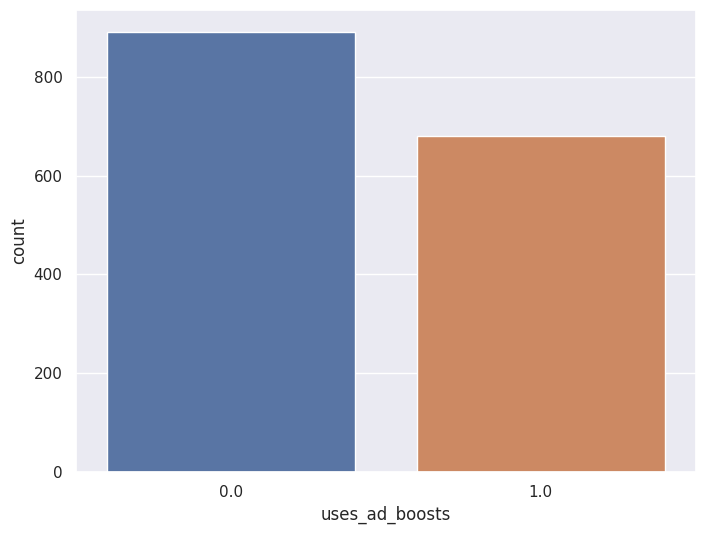

In [36]:
sns.countplot(x=sales_df['uses_ad_boosts'])

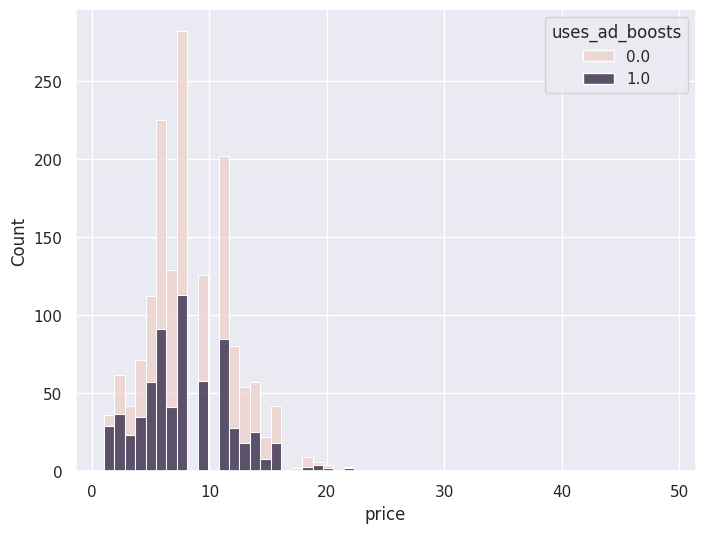

In [37]:
sns.histplot(x=sales_df['price'],hue=sales_df['uses_ad_boosts'],multiple='stack')

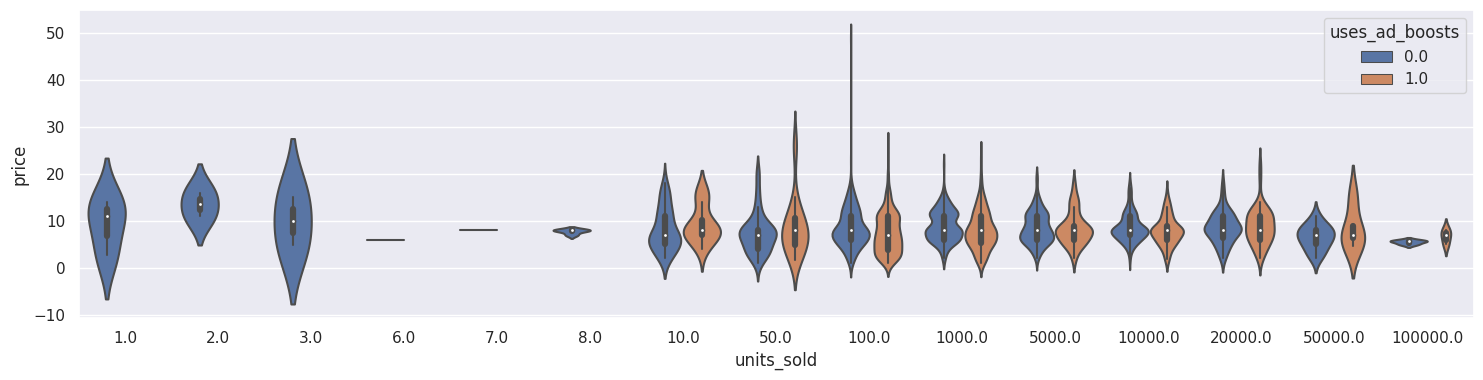

In [38]:
plt.figure(figsize=(18,4))
sns.violinplot(x=sales_df['units_sold'], y=sales_df['price'], hue=sales_df['uses_ad_boosts'])

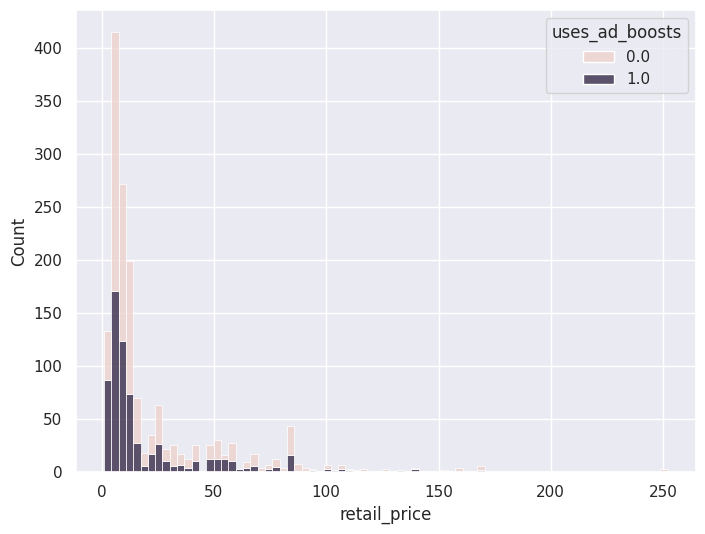

In [39]:
sns.histplot(x=sales_df['retail_price'],hue=sales_df['uses_ad_boosts'],multiple='stack')

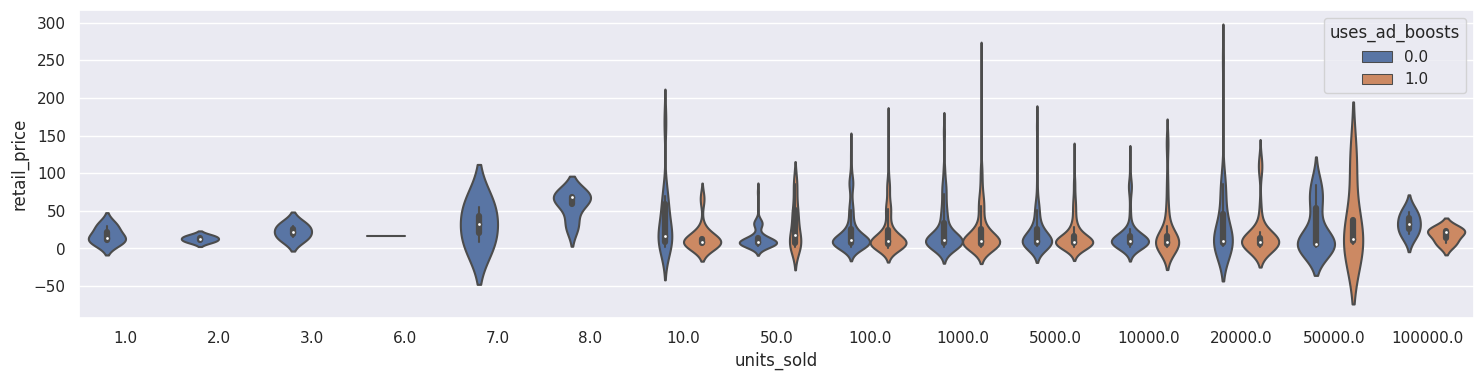

In [40]:
plt.figure(figsize=(18,4))
sns.violinplot(x=sales_df['units_sold'], y=sales_df['retail_price'], hue=sales_df['uses_ad_boosts'])

## Badge Analysis

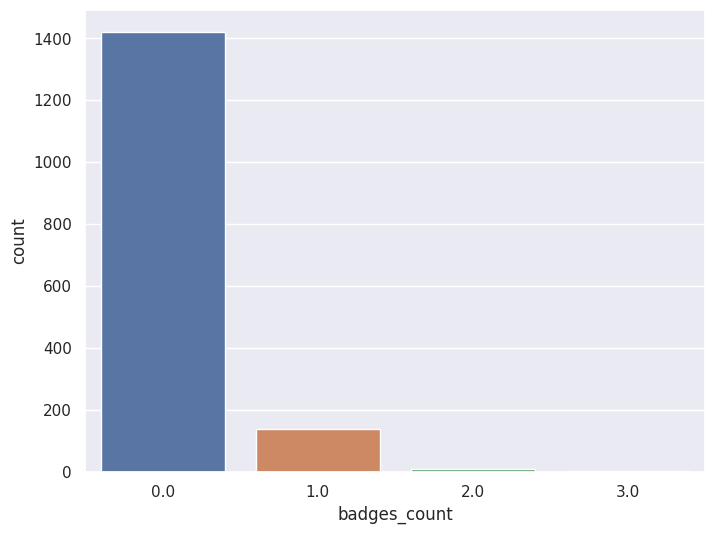

In [41]:
sns.countplot(x=sales_df['badges_count'])

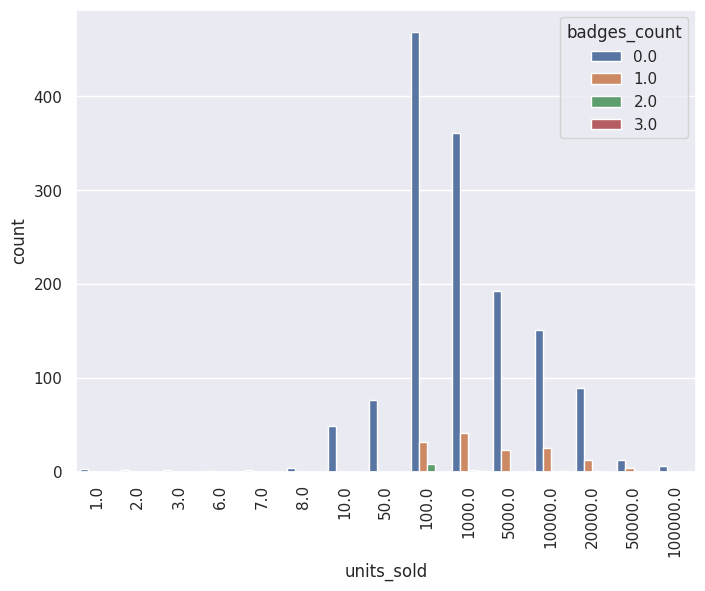

In [42]:
sns.countplot(x=sales_df['units_sold'],hue=sales_df['badges_count'])
plt.xticks(rotation=90,ha='center')
None

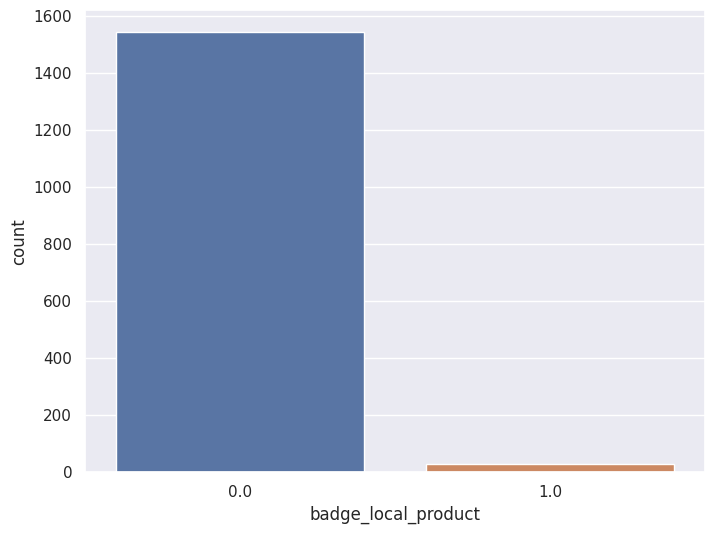

In [43]:
sns.countplot(x=sales_df['badge_local_product'])

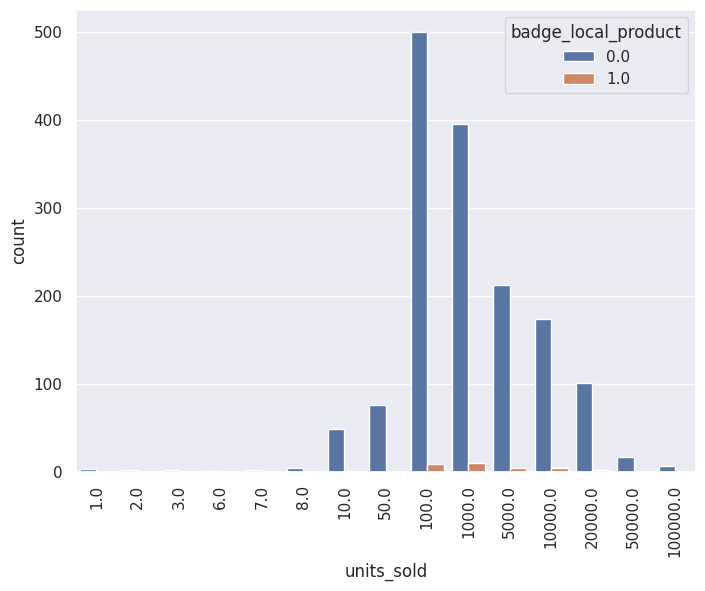

In [44]:
sns.countplot(x=sales_df['units_sold'],hue=sales_df['badge_local_product'])
plt.xticks(rotation=90,ha='center')
None

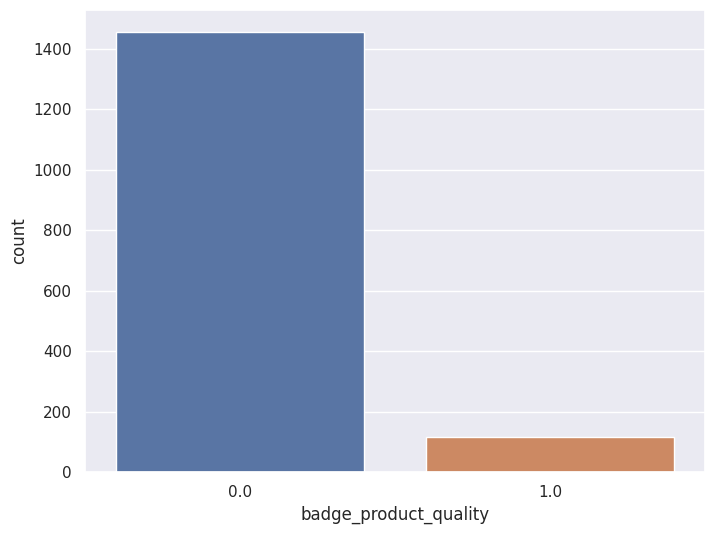

In [45]:
sns.countplot(x=sales_df['badge_product_quality'])

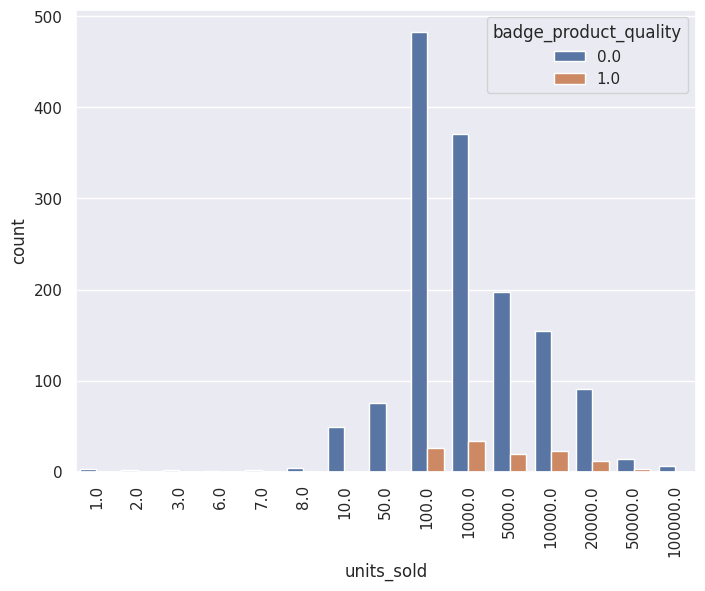

In [46]:
sns.countplot(x=sales_df['units_sold'],hue=sales_df['badge_product_quality'])
plt.xticks(rotation=90,ha='center')
None

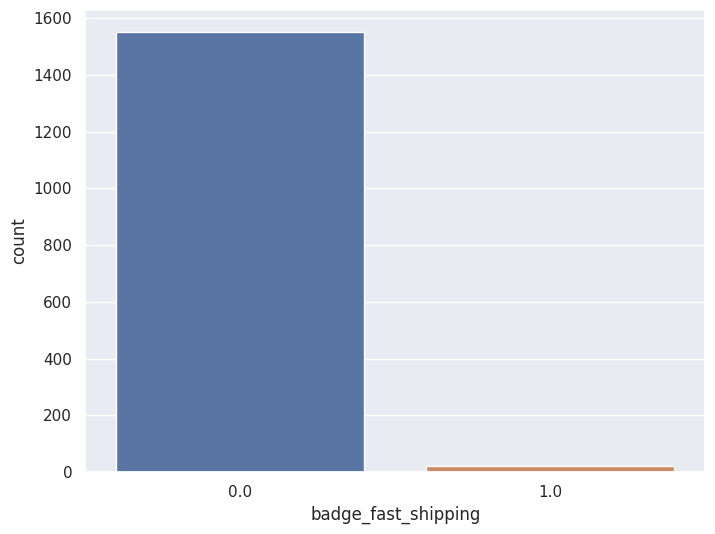

In [47]:
sns.countplot(x=sales_df['badge_fast_shipping'])

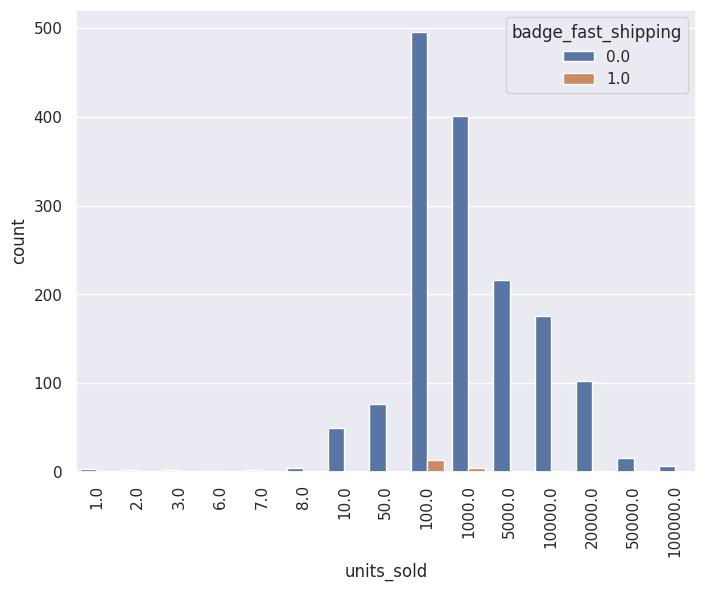

In [48]:
sns.countplot(x=sales_df['units_sold'],hue=sales_df['badge_fast_shipping'])
plt.xticks(rotation=90,ha='center')
None

## Product Variation

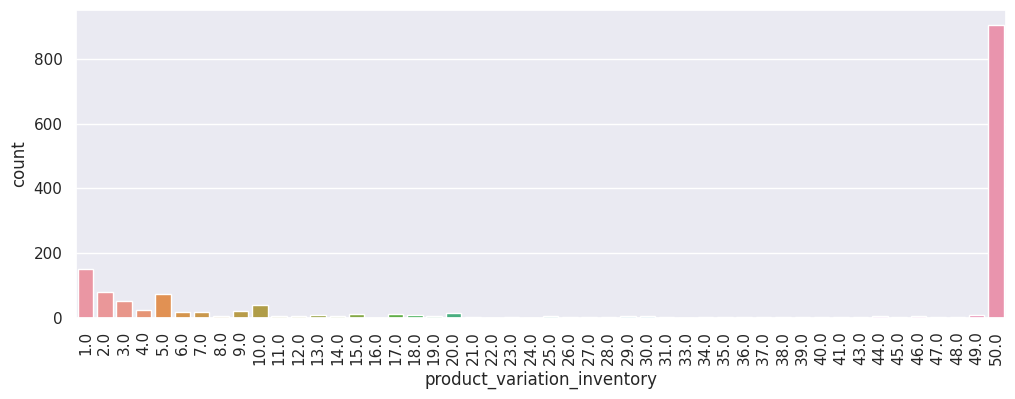

In [49]:
plt.figure(figsize=(12,4))
sns.countplot(x=sales_df['product_variation_inventory'])
plt.xticks(rotation=90, ha='center')
None


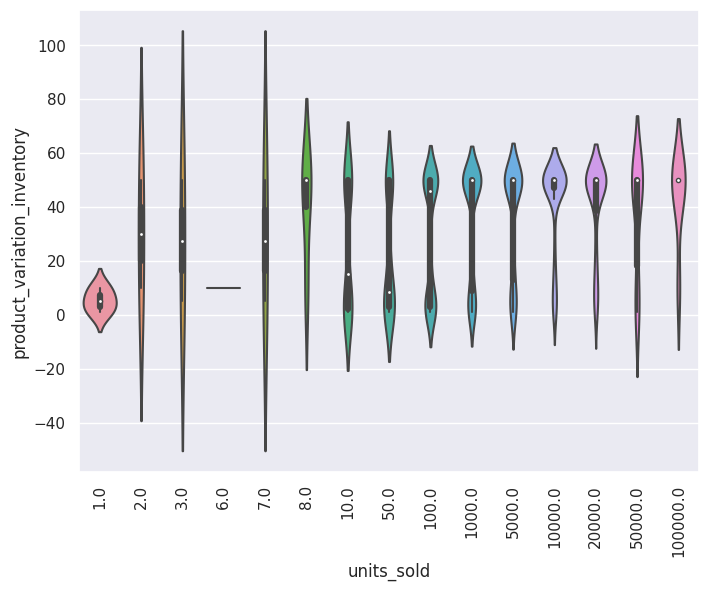

In [50]:
sns.violinplot(x=sales_df['units_sold'],y=sales_df['product_variation_inventory'])
plt.xticks(rotation=90,ha='center')
None

## Shipping Option

In [51]:
sales_df['shipping_option_name'].value_counts()

Livraison standard         1507
Standard Shipping            21
Envio Padrão                  9
Expediere Standard            6
Envío normal                  5
الشحن القياسي                 4
Standardowa wysyłka           3
Standardversand               3
Стандартная доставка          3
Livraison Express             3
การส่งสินค้ามาตรฐาน           2
Spedizione standard           2
Standart Gönderi              2
Ekspresowa wysyłka            1
0                             1
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Name: shipping_option_name, dtype: int64

In [52]:
sales_df['shipping_option_name'] = sales_df[['shipping_option_name']].apply(lambda col:pd.Categorical(col).codes)
sales_df['shipping_option_name'].value_counts()

 6     1507
 8       21
 2        9
 4        6
 3        5
 13       4
 12       3
 10       3
 9        3
 5        3
-1        2
 7        2
 11       2
 14       2
 15       1
 1        1
 0        1
Name: shipping_option_name, dtype: int64

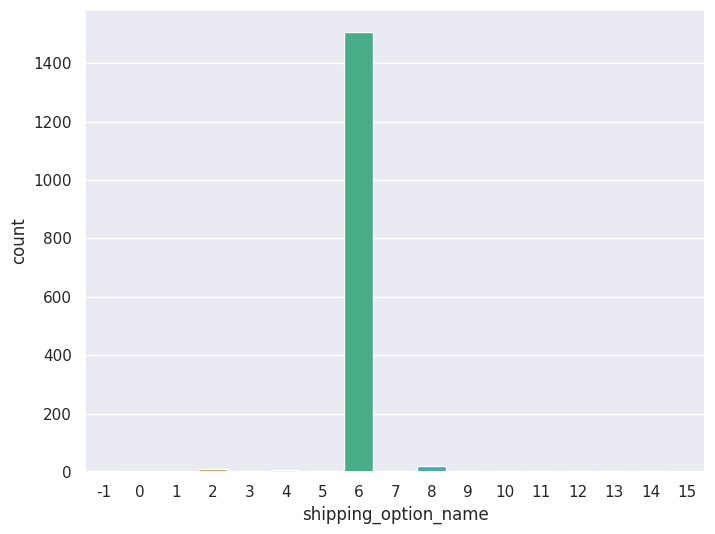

In [53]:
sns.countplot(x=sales_df['shipping_option_name'])

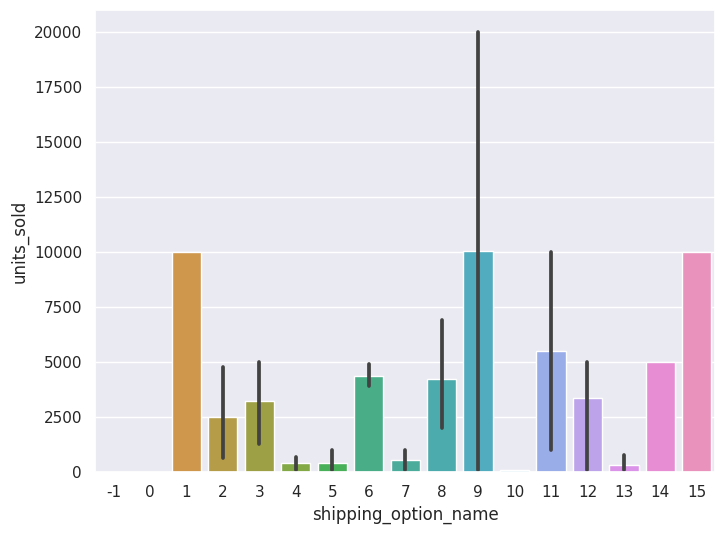

In [54]:
sns.barplot(x="shipping_option_name", y="units_sold", data=sales_df)


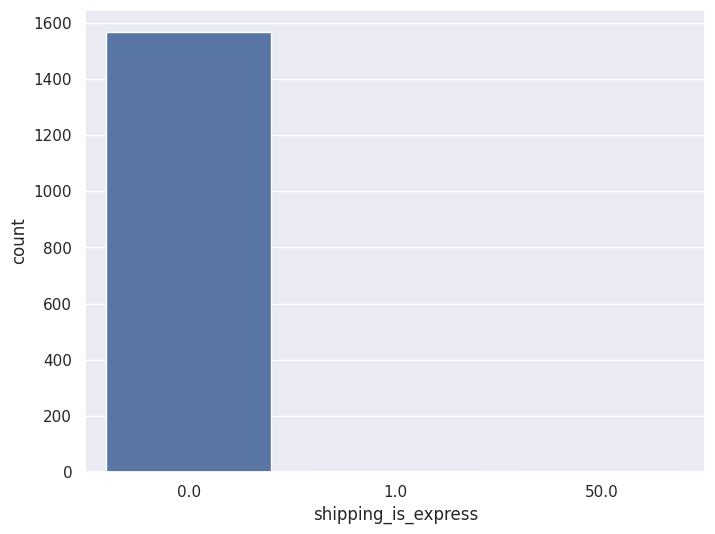

In [55]:
sns.countplot(x=sales_df['shipping_is_express'])

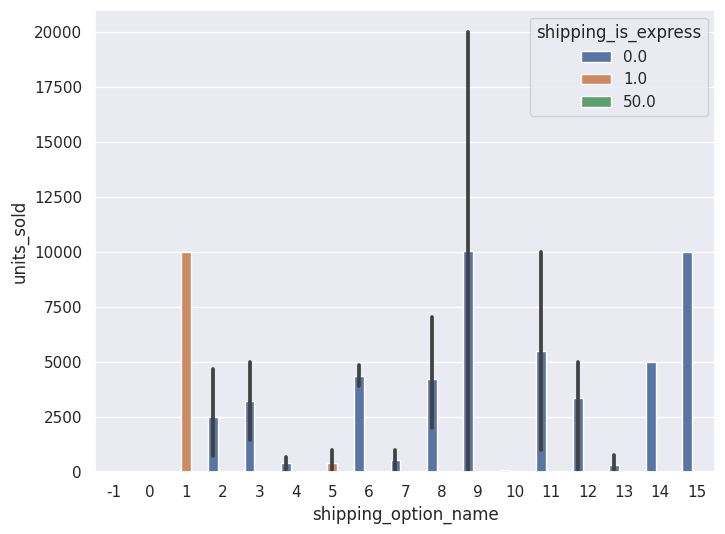

In [56]:
sns.barplot(x="shipping_option_name", y="units_sold", hue="shipping_is_express", data=sales_df)

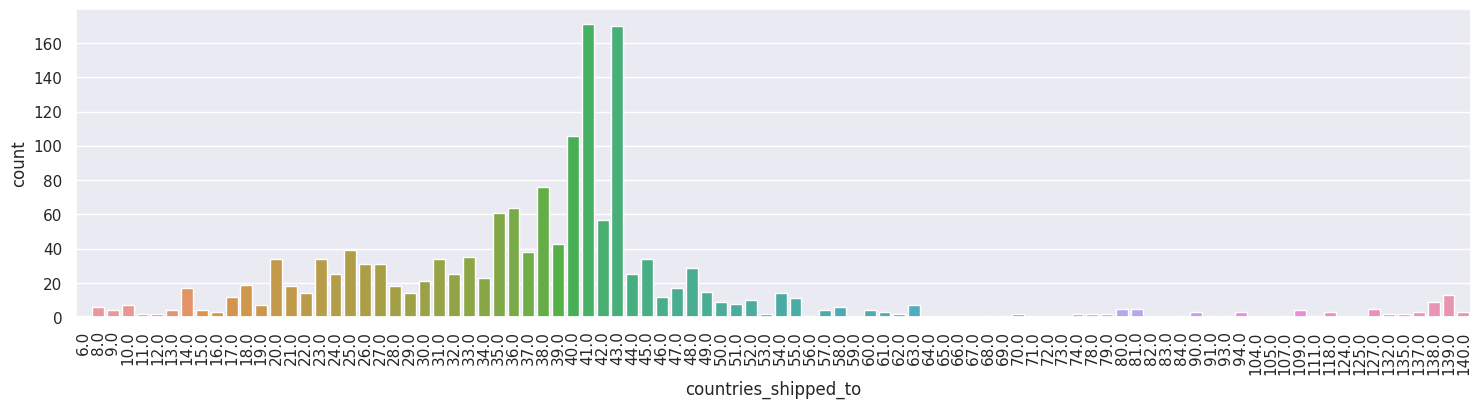

In [57]:
plt.figure(figsize=(18,4))
sns.countplot(x=sales_df['countries_shipped_to'])
plt.xticks(rotation=90, ha='center')
None

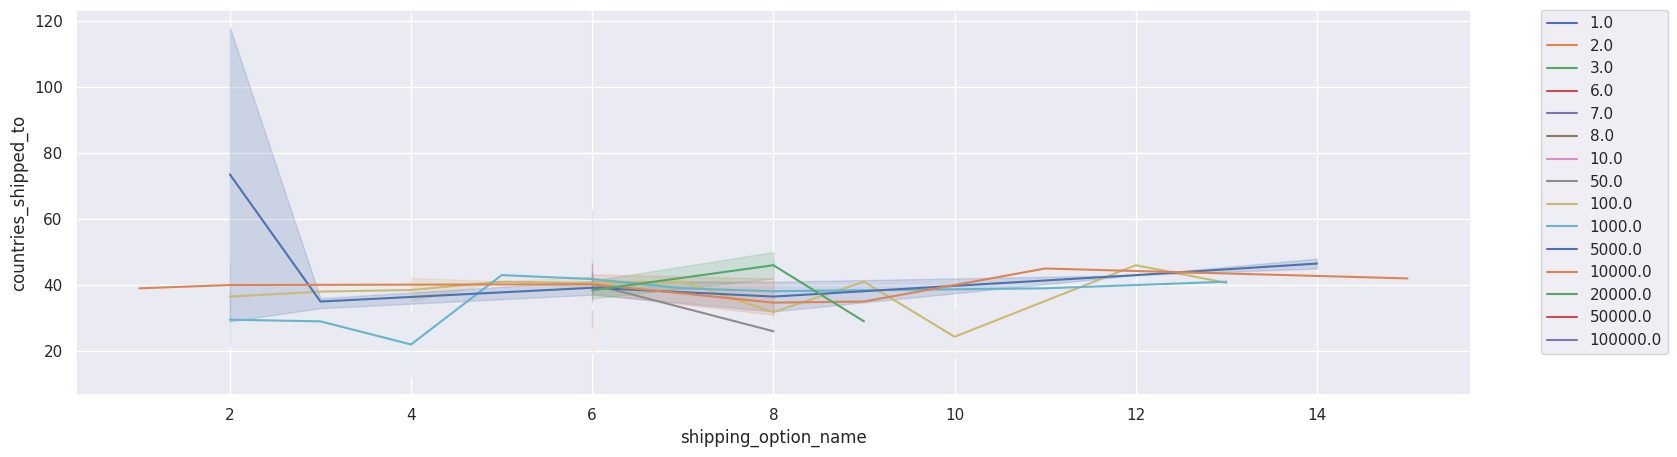

In [58]:
plt.figure(figsize=(18,5))
sns.lineplot(x='shipping_option_name',y='countries_shipped_to',hue='units_sold',palette=sns.color_palette(n_colors=len(sales_df['units_sold'].unique())).as_hex(), data=sales_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Urgency Analysis

In [59]:
sales_df['has_urgency_banner'].value_counts()

1.0    473
Name: has_urgency_banner, dtype: int64

In [60]:
sales_df.loc[sales_df['has_urgency_banner'] != 1,'has_urgency_banner'] = 0

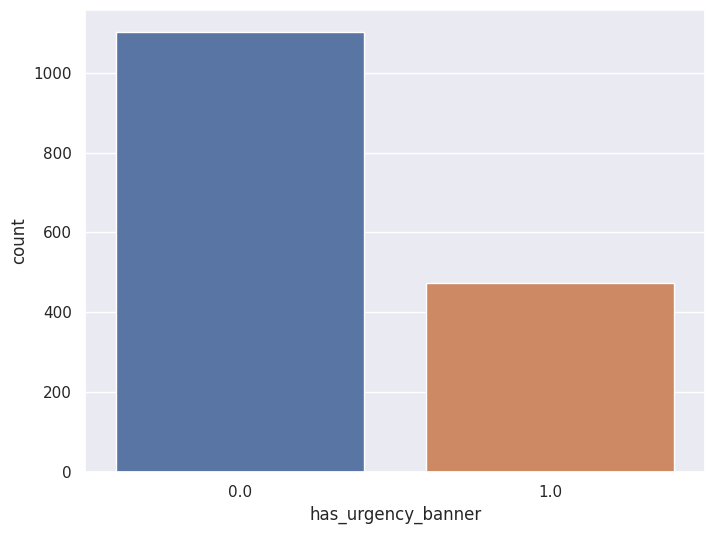

In [61]:
sns.countplot(x=sales_df['has_urgency_banner'])

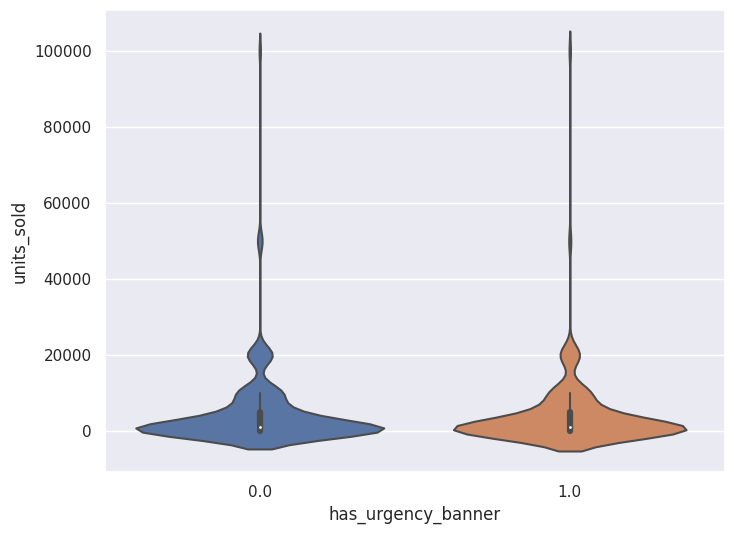

In [62]:
sns.violinplot(x=sales_df['has_urgency_banner'],y=sales_df['units_sold'])

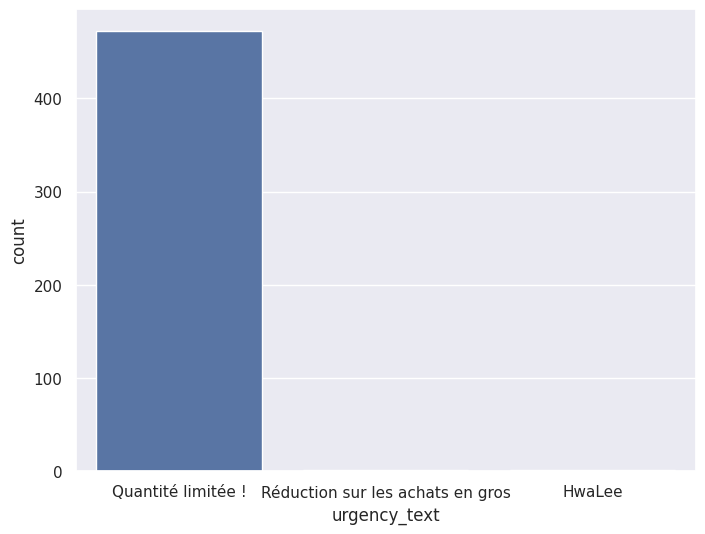

In [63]:
sns.countplot(x=sales_df['urgency_text'])

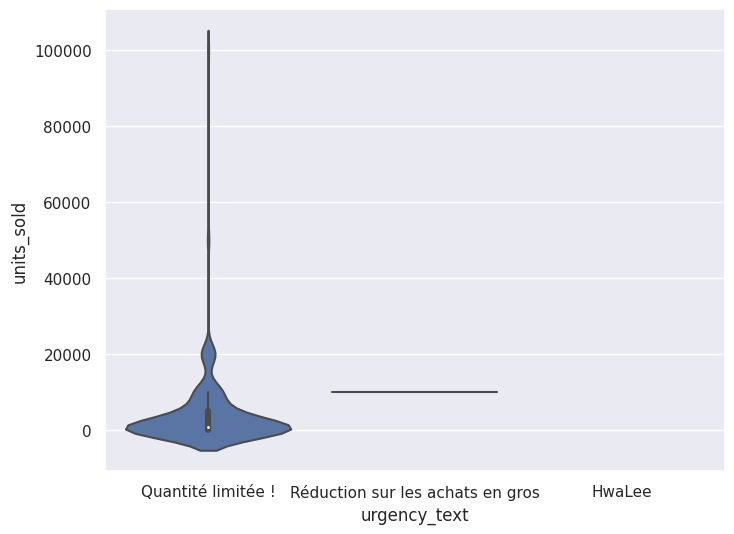

In [64]:
sns.violinplot(x=sales_df['urgency_text'],y=sales_df['units_sold'])

## Merchant Analysis

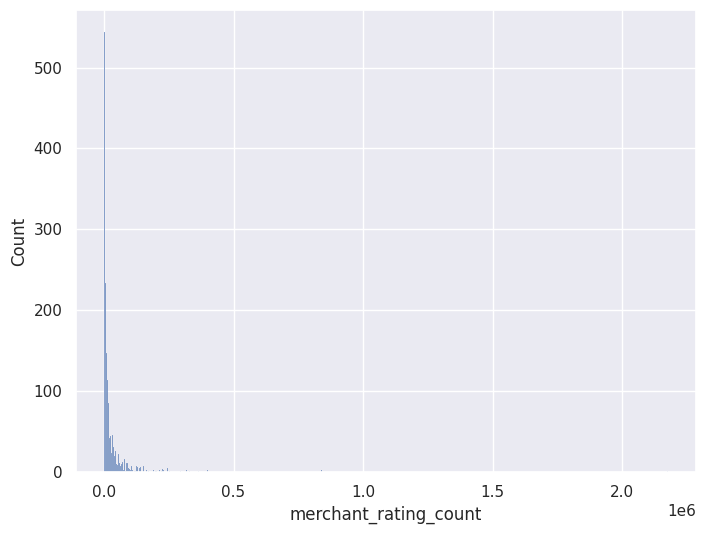

In [65]:
sns.histplot(x=sales_df['merchant_rating_count'])

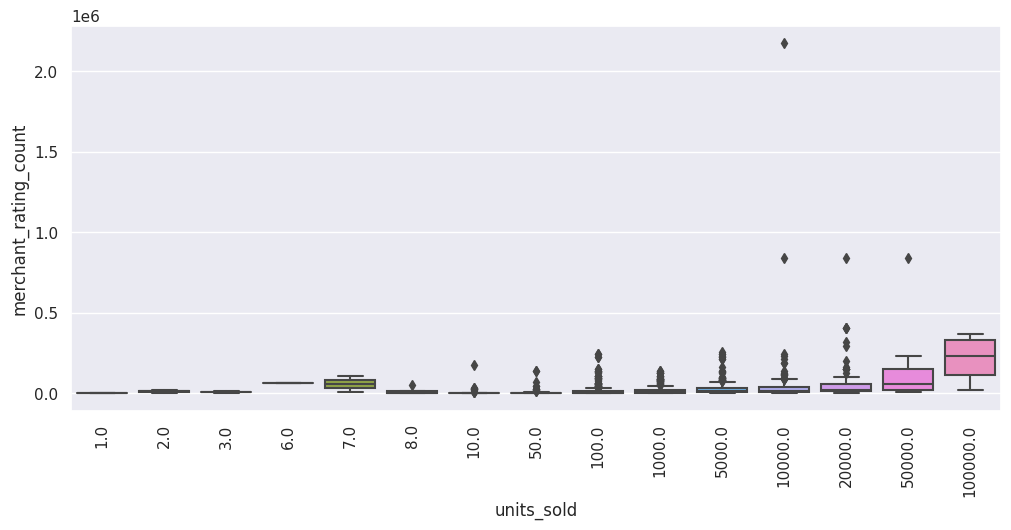

In [66]:
plt.figure(figsize=(12,5))
sns.boxplot(y=sales_df['merchant_rating_count'], x=sales_df['units_sold'])
plt.xticks(rotation=90,ha='center')
None

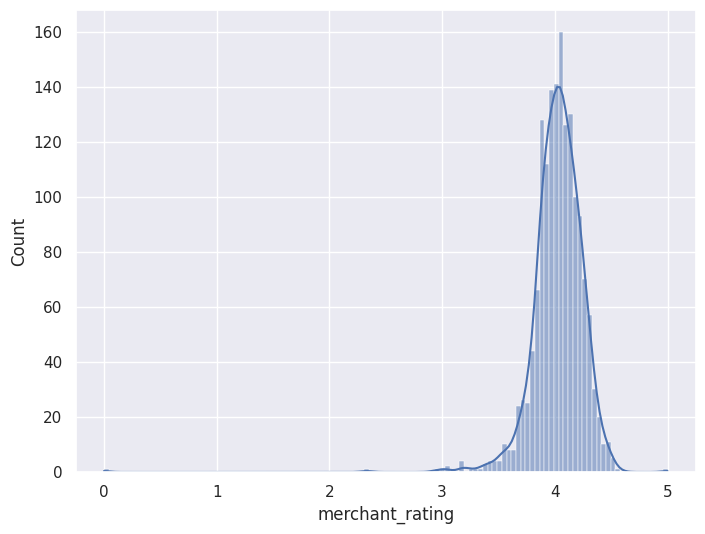

In [67]:
sns.histplot(x=sales_df['merchant_rating'],kde=True)

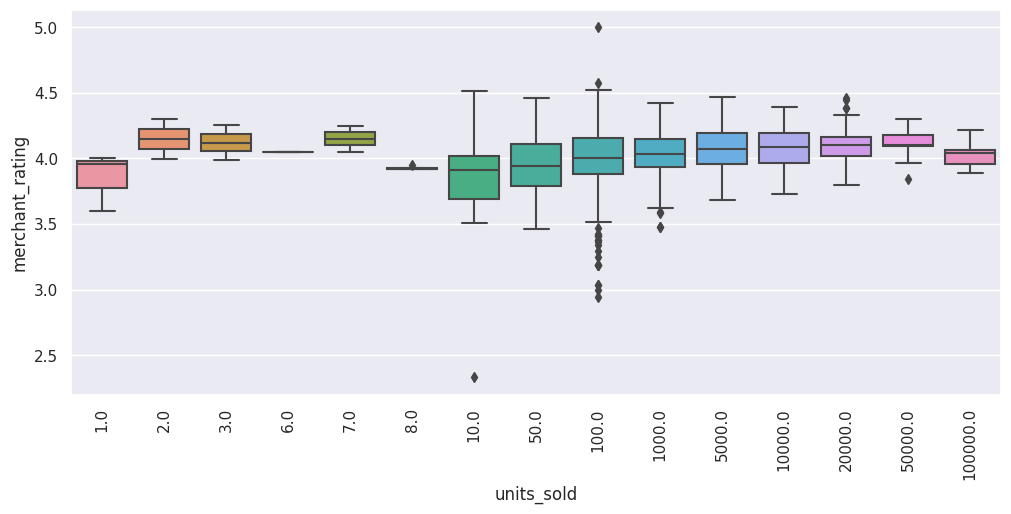

In [68]:
plt.figure(figsize=(12,5))
sns.boxplot(y=sales_df['merchant_rating'], x=sales_df['units_sold'])
plt.xticks(rotation=90,ha='center')
None

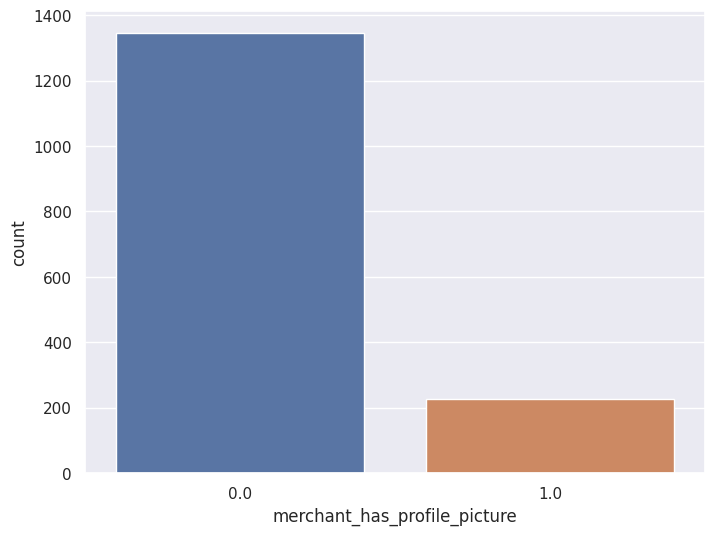

In [69]:
sns.countplot(x=sales_df['merchant_has_profile_picture'])

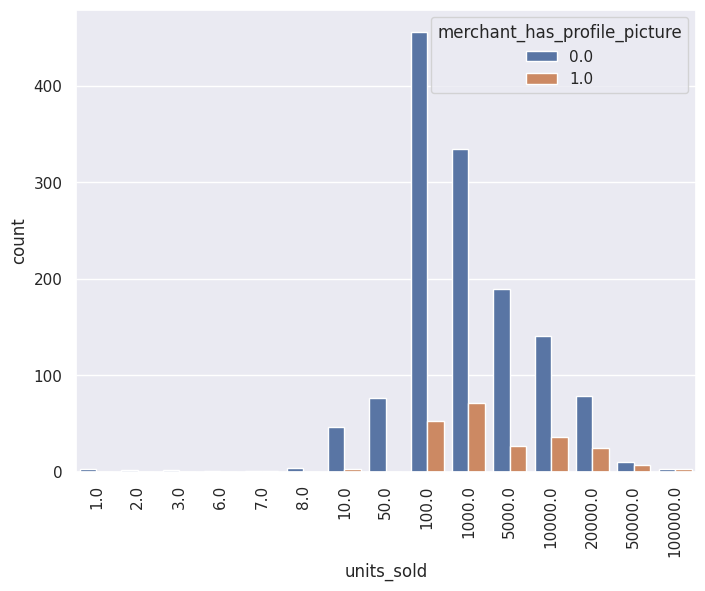

In [70]:
sns.countplot(hue=sales_df['merchant_has_profile_picture'],x=sales_df['units_sold'])
plt.xticks(rotation=90,ha='center')
None

## Tags Visualization

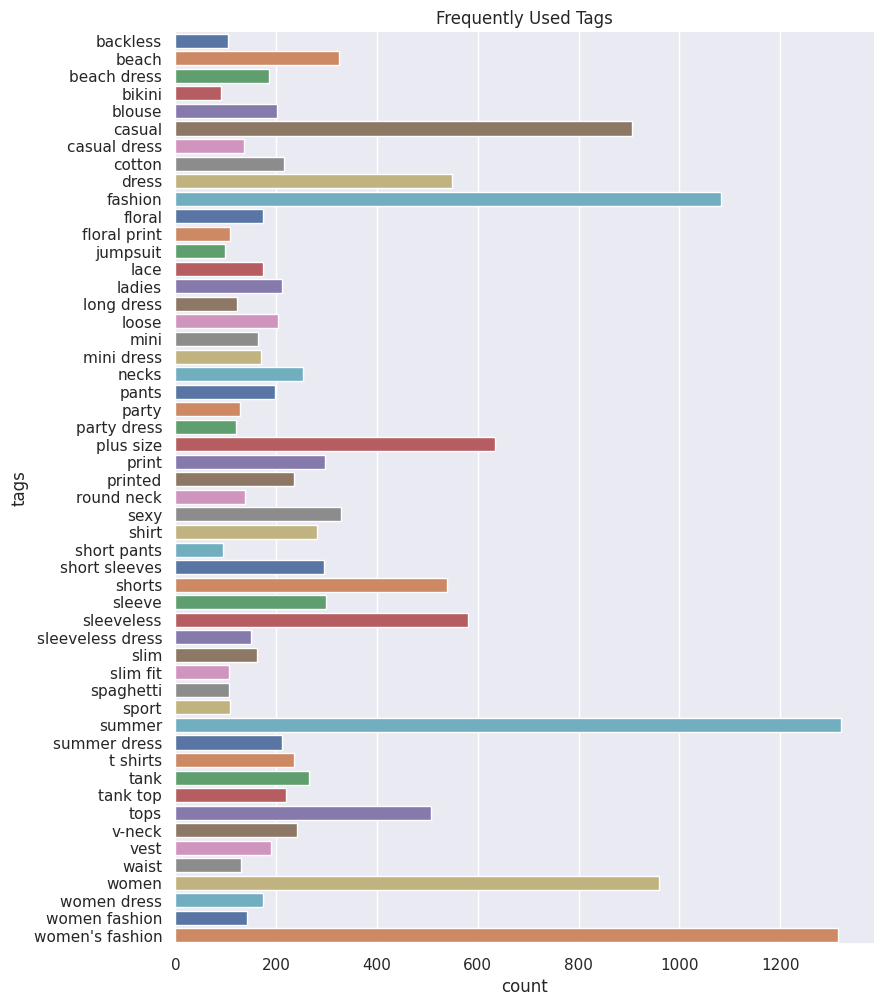

In [77]:
sales_df["tags"] = sales_df["tags"].str.lower()
tagLists = sales_df["tags"].str.split(",").tolist()

tags = []
for tagList in tagLists:
    if isinstance(tagList,list):
        for word in tagList:
            tags.append(word)
        
uniqueTags, count = np.unique(tags, return_counts=True)
tags_df = pd.DataFrame({"tags": uniqueTags,"count": count})
frequentTags = tags_df[tags_df["count"]>90].reset_index(drop=True)

sns.catplot(x = 'count',y = 'tags',data=frequentTags, aspect=.9, height = 10,
               kind="bar", palette = "deep").set(title = "Frequently Used Tags")

## Data Visualization

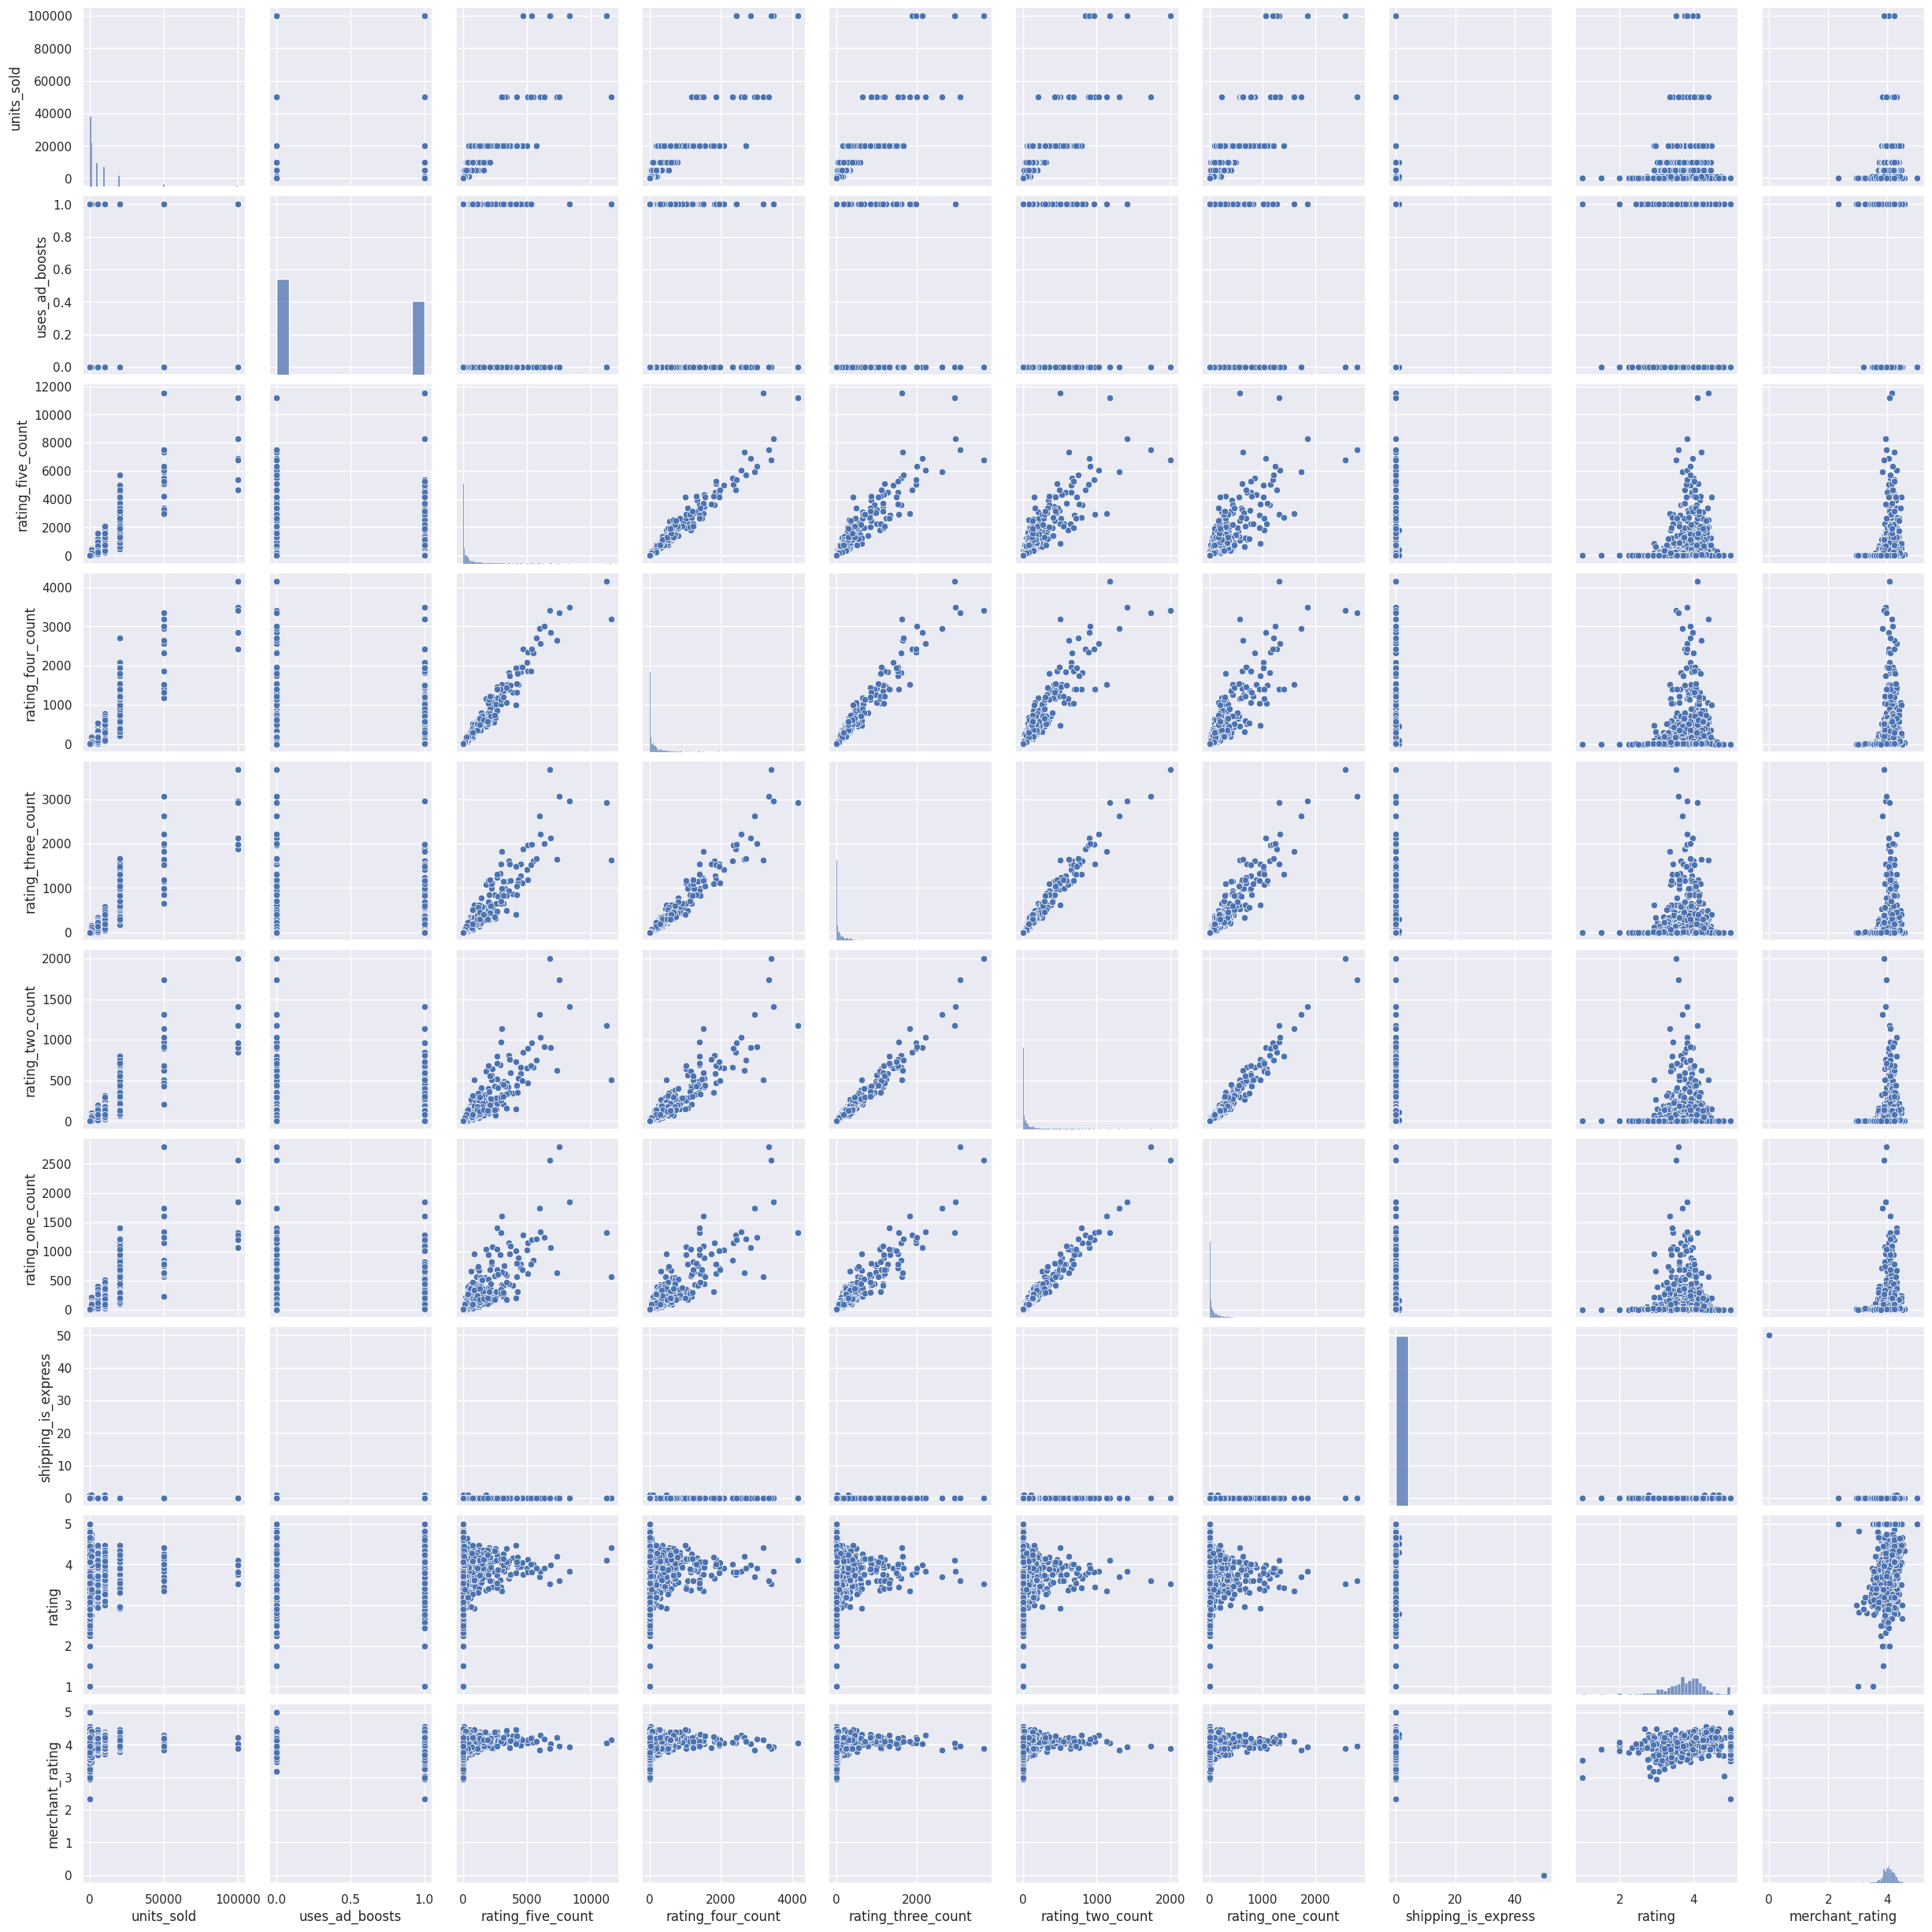

In [78]:
sns.pairplot(sales_df[["units_sold","uses_ad_boosts","rating_five_count","rating_four_count","rating_three_count","rating_two_count","rating_one_count","shipping_is_express","rating","merchant_rating"]],height=2.5)

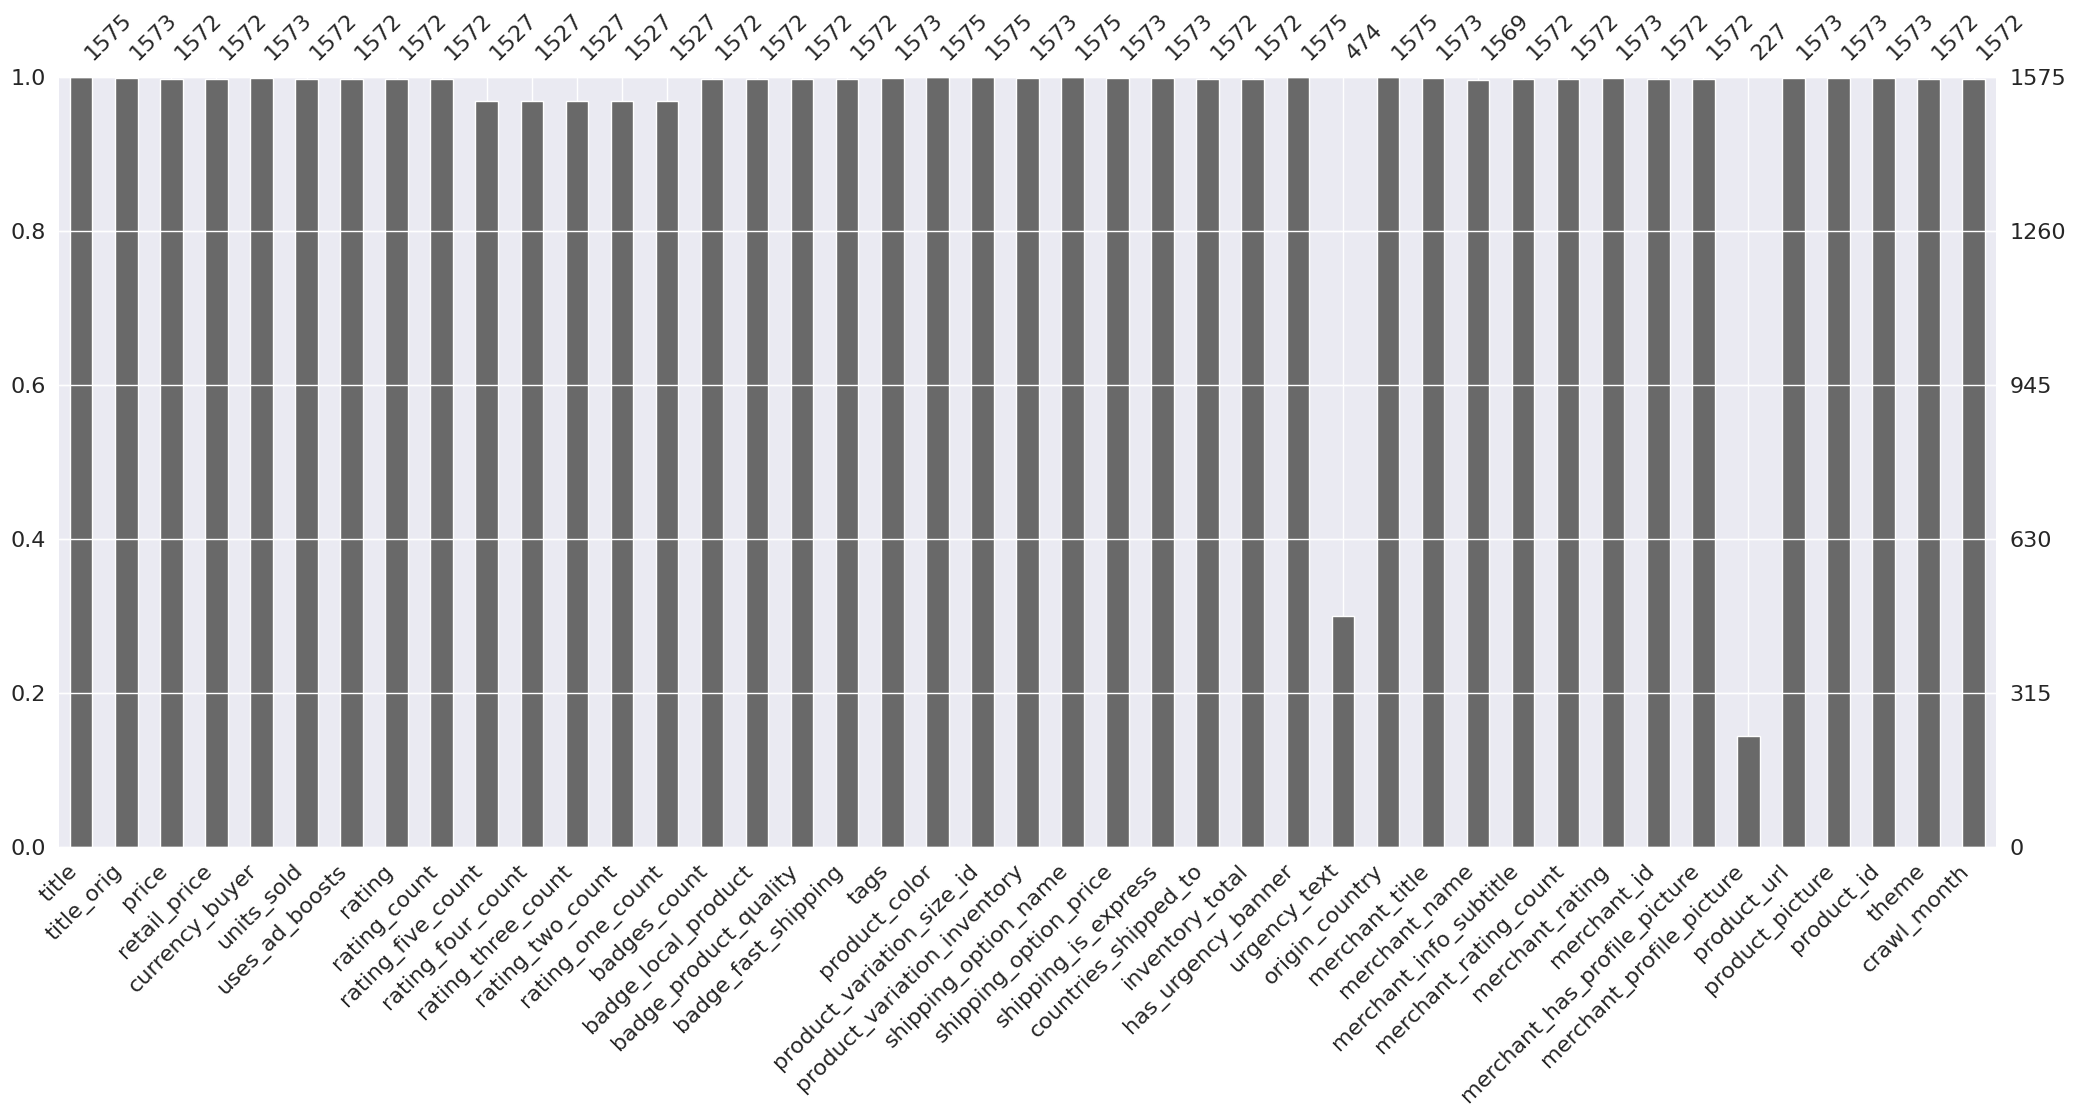

In [79]:
msno.bar(sales_df)

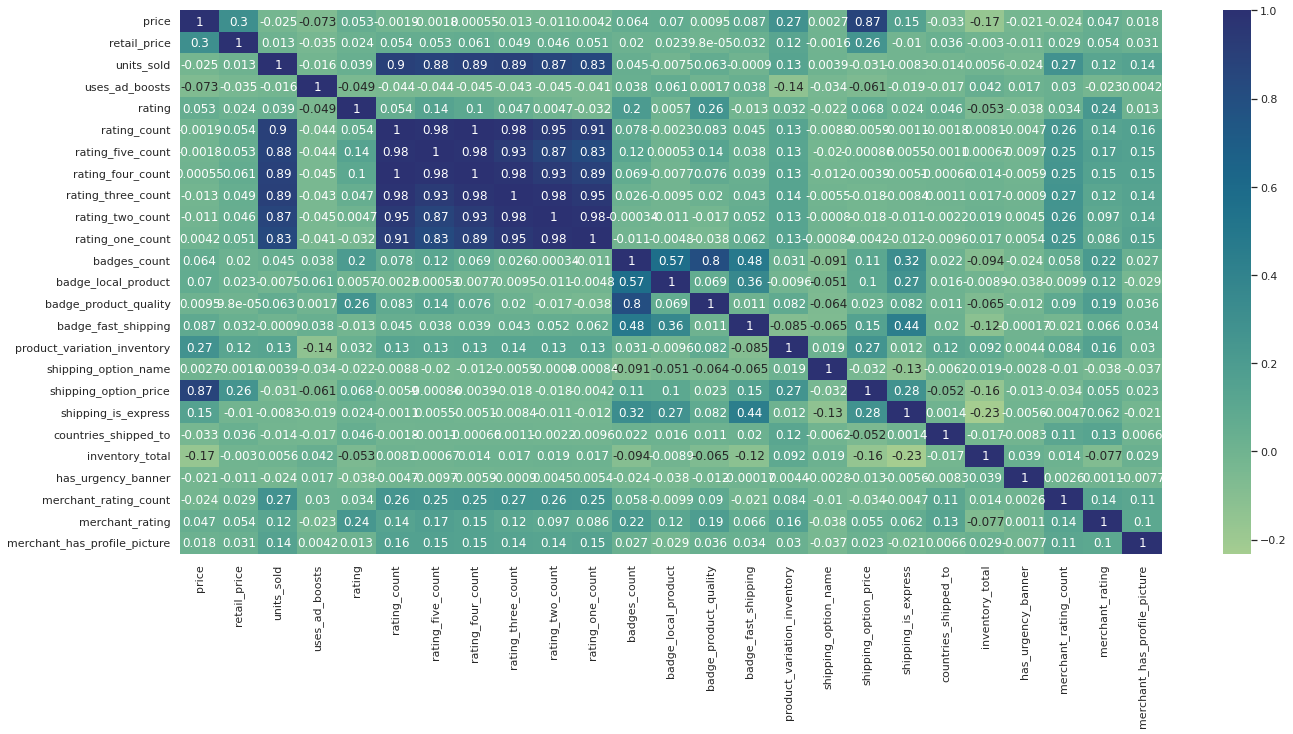

In [73]:
corr = sales_df.corr()
plt.figure(figsize=(22,10))
sns.heatmap(corr,annot=True,cmap='crest')

# Pre-Processing

In [80]:
# Ratings column as shown in Heatmaps are highly colinear with each other as expected, but since "rating" column is average of several star rating column,lets drop one star to five star column
# Columns with ids will mislead our algorithms so lets drop them
# columns have about one value dominating about 98%. Moreover have very low correlation threshold.

# unnecessary_features = [
#     'rating_five_count', 'rating_four_count','rating_three_count','rating_two_count','rating_one_count','merchant_id','product_id',
#     'title', 'title_orig', 'currency_buyer','urgency_text','merchant_title', 'merchant_info_subtitle', 'merchant_profile_picture',
#     'product_url', 'product_picture', 'theme', 'crawl_month','merchant_name'
# ]

unnecessary_features = [
    'title', 'title_orig', 'currency_buyer', 'rating_five_count', 'rating_four_count','rating_three_count','rating_two_count'
    ,'rating_one_count','badge_local_product', 'badge_product_quality', 'badge_fast_shipping', 'product_variation_inventory', 'shipping_option_name','inventory_total','merchant_name',
    'merchant_info_subtitle', 'merchant_id', 'merchant_profile_picture', 'product_url','product_picture', 'product_id', 'urgency_text',
    'theme','tags','crawl_month'
]

In [100]:
data_df = sales_df.drop(unnecessary_features, axis=1)
data_df.head()

price  retail_price  units_sold  uses_ad_boosts  rating  rating_count  \
0  16.00          14.0       100.0             0.0    3.76          54.0   
1   8.00          22.0     20000.0             1.0    3.45        6135.0   
2   8.00          43.0       100.0             0.0    3.57          14.0   
3   8.00           8.0      5000.0             1.0    4.03         579.0   
4   2.72           3.0       100.0             1.0    3.10          20.0   

   badges_count product_color product_variation_size_id  \
0           0.0         white                         M   
1           0.0         green                        XS   
2           0.0         other                        XS   
3           0.0         black                         M   
4           0.0        yellow                         S   

   shipping_option_price  shipping_is_express  countries_shipped_to  \
0                    4.0                  0.0                  34.0   
1                    2.0                  0.0                  41.0   
2                    3.0                  0.0                  36.0   
3                    2.0                  0.0                  41.0   
4                    1.0                  0.0                  35.0   

   has_urgency_banner origin_country   merchant_title  merchant_rating_count  \
0                 1.0             CN         zgrdejia                  568.0   
1                 1.0             CN        SaraHouse                17752.0   
2                 1.0             CN           hxt520                  295.0   
3                 0.0             CN         allenfan                23832.0   
4                 1.0             CN  youngpeopleshop                14482.0   

   merchant_rating  merchant_has_profile_picture  
0         4.128521                           0.0  
1         3.899673                           0.0  
2         3.989831                           0.0  
3         4.020435                           0.0  
4         4.001588                           0.0

In [101]:
cat_cols = ['uses_ad_boosts','product_color','product_variation_size_id','shipping_is_express','countries_shipped_to','has_urgency_banner','origin_country','merchant_title','merchant_has_profile_picture']
num_cols = []

for col in data_df.columns:
    if (not col in cat_cols) and (not col == 'units_sold'):
        num_cols.append(col)
        
num_cols

['price',
 'retail_price',
 'rating',
 'rating_count',
 'badges_count',
 'shipping_option_price',
 'merchant_rating_count',
 'merchant_rating']

In [102]:
y_data = data_df['units_sold'].copy()
y_data[data_df['units_sold'] <= 100] = '<=100'
y_data[(data_df['units_sold'] > 100) & (data_df['units_sold'] <= 5000)] = '100+_to_5000'
y_data[data_df['units_sold'] > 5000] ='5000+'
y_data.fillna(method = 'ffill', inplace = True)

In [103]:
data_df.drop('units_sold',axis=1,inplace=True)
X_data = data_df
X_data.fillna(method = 'ffill', inplace = True)

In [104]:
X_data.head()

price  retail_price  uses_ad_boosts  rating  rating_count  badges_count  \
0  16.00          14.0             0.0    3.76          54.0           0.0   
1   8.00          22.0             1.0    3.45        6135.0           0.0   
2   8.00          43.0             0.0    3.57          14.0           0.0   
3   8.00           8.0             1.0    4.03         579.0           0.0   
4   2.72           3.0             1.0    3.10          20.0           0.0   

  product_color product_variation_size_id  shipping_option_price  \
0         white                         M                    4.0   
1         green                        XS                    2.0   
2         other                        XS                    3.0   
3         black                         M                    2.0   
4        yellow                         S                    1.0   

   shipping_is_express  countries_shipped_to  has_urgency_banner  \
0                  0.0                  34.0                 1.0   
1                  0.0                  41.0                 1.0   
2                  0.0                  36.0                 1.0   
3                  0.0                  41.0                 0.0   
4                  0.0                  35.0                 1.0   

  origin_country   merchant_title  merchant_rating_count  merchant_rating  \
0             CN         zgrdejia                  568.0         4.128521   
1             CN        SaraHouse                17752.0         3.899673   
2             CN           hxt520                  295.0         3.989831   
3             CN         allenfan                23832.0         4.020435   
4             CN  youngpeopleshop                14482.0         4.001588   

   merchant_has_profile_picture  
0                           0.0  
1                           0.0  
2                           0.0  
3                           0.0  
4                           0.0

In [105]:
y_data.unique()

array(['<=100', '5000+', '100+_to_5000'], dtype=object)

In [112]:

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import OneHotEncoder,MinMaxScaler, StandardScaler


ct = ColumnTransformer([
    ('num',make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),StandardScaler()),num_cols),
    ('cat',make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(handle_unknown='ignore')),cat_cols)
])

In [107]:
### Your code here
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X_data,y_data, test_size = 0.15,stratify=y_data, random_state=0)

# Modelling

In [108]:

from sklearn.metrics import accuracy_score,balanced_accuracy_score,f1_score,roc_auc_score,average_precision_score, confusion_matrix, classification_report
pred_data = {}

def model_stats(y, y_hat):
    acc = accuracy_score(y,y_hat)
    bacc = balanced_accuracy_score(y,y_hat)
    f1 = f1_score(y,y_hat, average='micro')
    
    print('Accuracy Score', acc)
    print('Balanced Accuracy', bacc)
    print('F1 Score', f1)
    
    clas_report = classification_report(y,y_hat)
    cnf_mat = confusion_matrix(y,y_hat)
    
    print(clas_report)
    
    return {'Acc':acc, 'Bal_Acc':bacc, 'f1':f1}

In [109]:
from sklearn.metrics import roc_curve, auc

def replaceClasses(arr, tclass):
  tarr = arr.copy()
  tarr[~(tarr == tclass)] = 0
  tarr[tarr == tclass] = 1
  tarr = tarr.astype(int)

  return tarr

def plot_multiclass_roc(y_true, y_hat, figsize=(8, 6)):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    classes = y_true.unique()

    for tclass in classes:
        y_true_temp = replaceClasses(y_true.to_numpy(),tclass)
        y_hat_temp = replaceClasses(y_hat,tclass)
        fpr[tclass], tpr[tclass], _ = roc_curve(y_true_temp, y_hat_temp)
        roc_auc[tclass] = auc(fpr[tclass], tpr[tclass])
        

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    for tclass in classes:
        ax.plot(fpr[tclass], tpr[tclass], label=f'ROC curve (area = {round(roc_auc[tclass],2)}) for label {tclass}')

    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# plot_multiclass_roc(y_test,best_knn_pipe.predict(X_test))

###  Logistic Regression

In [113]:
### Your code here
from sklearn.linear_model import LogisticRegression


lrc = LogisticRegression()
lrc_pipe = Pipeline(steps=[
    ('prep',ct),
    ('model', lrc)
])
lrc_pipe.fit(X_train,y_train)
lrc_pipe.score(X_test,y_test)

0.8059071729957806

In [114]:
param_grid = {
    'model__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'model__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'model__max_iter' : [100, 1000,2500, 5000]
}

lrc_grid = GridSearchCV(lrc_pipe,param_grid)
lrc_grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                   

In [115]:
### Your code here
print(lrc_grid.best_params_)
best_lrc_pipe = lrc_grid.best_estimator_
pred_data['LRC'] = model_stats(y_test,best_lrc_pipe.predict(X_test))

{'model__max_iter': 2500, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Accuracy Score 0.8818565400843882
Balanced Accuracy 0.8745551516539294
F1 Score 0.8818565400843882
              precision    recall  f1-score   support

100+_to_5000       0.88      0.81      0.84        93
       5000+       0.85      0.85      0.85        46
       <=100       0.90      0.97      0.93        98

    accuracy                           0.88       237
   macro avg       0.88      0.87      0.87       237
weighted avg       0.88      0.88      0.88       237



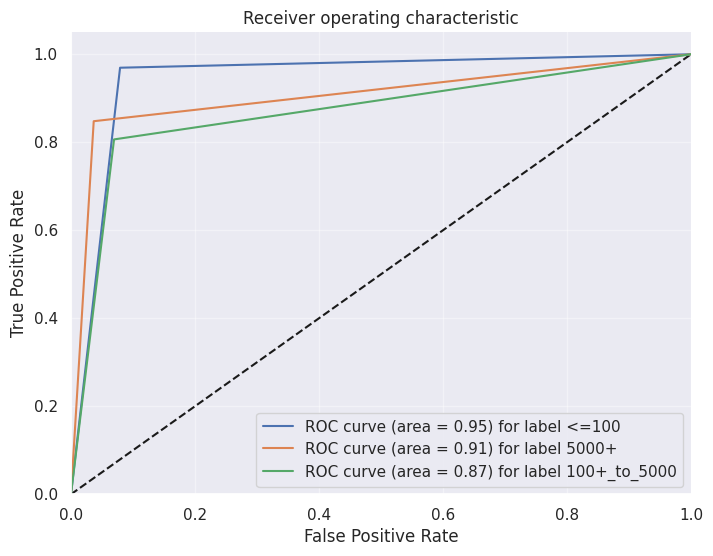

In [116]:
plot_multiclass_roc(y_test,best_lrc_pipe.predict(X_test))

### KNN

In [117]:
### Your code here
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_pipe = Pipeline(steps=[
    ('prep',ct),
    ('model', knn)
])
knn_pipe.fit(X_train,y_train)
knn_pipe.score(X_test,y_test)


0.6075949367088608

In [118]:
### Your code here
param_grid = {
    'model__n_neighbors': [5,7,9,10,11,13,15,20,30],
    'model__weights': ['uniform','distance'],
    'model__metric': ['minkowski','euclidean','manhattan']
}

knn_grid = GridSearchCV(knn_pipe,param_grid)
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                   

In [119]:
print(knn_grid.best_params_)
best_knn_pipe = knn_grid.best_estimator_
pred_data['knn'] = model_stats(y_test,best_knn_pipe.predict(X_test))


{'model__metric': 'manhattan', 'model__n_neighbors': 10, 'model__weights': 'distance'}
Accuracy Score 0.6877637130801688
Balanced Accuracy 0.6483336672677487
F1 Score 0.6877637130801688
              precision    recall  f1-score   support

100+_to_5000       0.59      0.77      0.67        93
       5000+       0.91      0.46      0.61        46
       <=100       0.76      0.71      0.74        98

    accuracy                           0.69       237
   macro avg       0.75      0.65      0.67       237
weighted avg       0.72      0.69      0.69       237



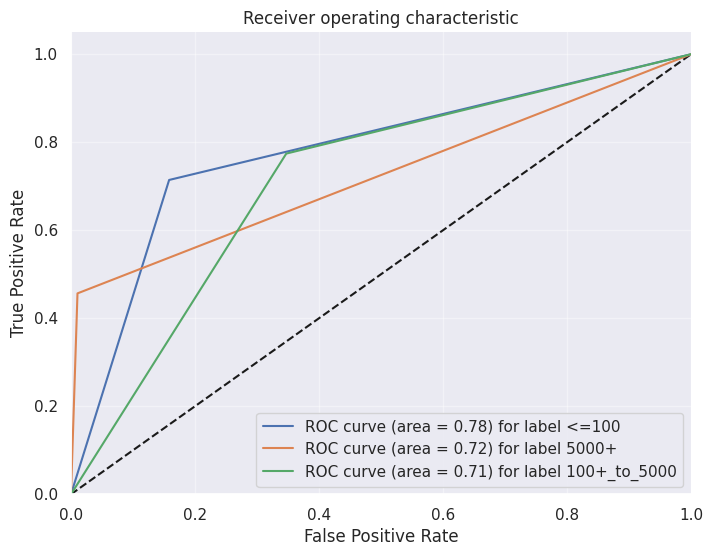

In [120]:
plot_multiclass_roc(y_test,best_knn_pipe.predict(X_test))

### SVM

In [121]:
from sklearn.svm import SVC

svc = SVC()
svc_pipe = Pipeline(steps=[
    ('prep',ct),
    ('model', svc)
])
svc_pipe.fit(X_train,y_train)
svc_pipe.score(X_test,y_test)

0.7510548523206751

In [122]:
param_grid = {
    'model__C':[0.1,1,100,1000],
    'model__kernel':['rbf','poly','sigmoid','linear'],
    'model__degree':[1,2,3,4,5,6]
}

svc_grid = GridSearchCV(svc_pipe,param_grid)
svc_grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                   

In [123]:
### Your code here
print(svc_grid.best_params_)
best_svc_pipe = svc_grid.best_estimator_
pred_data['SVC'] = model_stats(y_test,best_svc_pipe.predict(X_test))

{'model__C': 100, 'model__degree': 1, 'model__kernel': 'poly'}
Accuracy Score 0.8734177215189873
Balanced Accuracy 0.8606110045701311
F1 Score 0.8734177215189873
              precision    recall  f1-score   support

100+_to_5000       0.84      0.84      0.84        93
       5000+       0.82      0.80      0.81        46
       <=100       0.93      0.94      0.93        98

    accuracy                           0.87       237
   macro avg       0.86      0.86      0.86       237
weighted avg       0.87      0.87      0.87       237



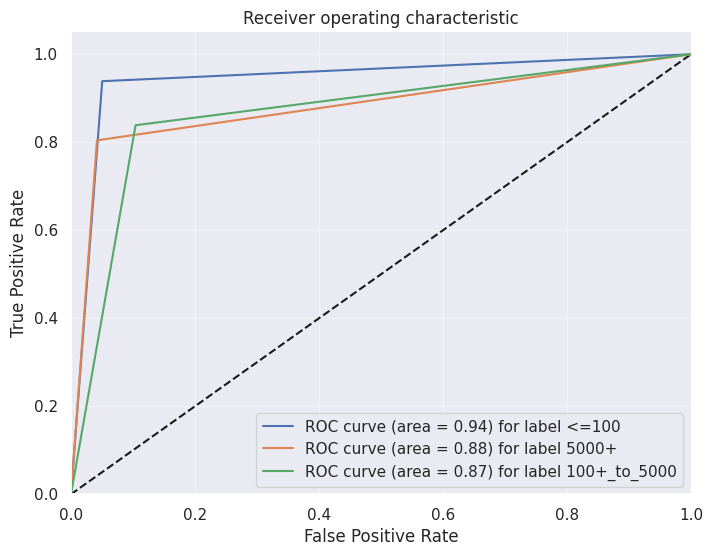

In [124]:
plot_multiclass_roc(y_test,best_svc_pipe.predict(X_test))

### Decision Tree

In [125]:
### Your code here
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_pipe = Pipeline(steps=[
    ('prep',ct),
    ('model', dtc)
])
dtc_pipe.fit(X_train,y_train)
dtc_pipe.score(X_test,y_test)

0.8818565400843882

In [126]:
 param_grid = {
    'model__criterion': ['gini','entropy'],
    'model__splitter': ['best','random'],
    'model__max_depth': [2, 3, 5, 10, 20],
    'model__min_samples_leaf': [5, 10, 20, 50, 100],
    'model__min_samples_split':[8,10,12,18,20,16]
}

dtc_grid = GridSearchCV(dtc_pipe,param_grid)
dtc_grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                   

In [127]:
### Your code here
print(dtc_grid.best_params_)
best_dtc_pipe = dtc_grid.best_estimator_
pred_data['DTC'] = model_stats(y_test,best_dtc_pipe.predict(X_test))

{'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 10, 'model__min_samples_split': 20, 'model__splitter': 'best'}
Accuracy Score 0.8523206751054853
Balanced Accuracy 0.8436042018490427
F1 Score 0.8523206751054853
              precision    recall  f1-score   support

100+_to_5000       0.80      0.84      0.82        93
       5000+       0.84      0.80      0.82        46
       <=100       0.92      0.89      0.90        98

    accuracy                           0.85       237
   macro avg       0.85      0.84      0.85       237
weighted avg       0.85      0.85      0.85       237



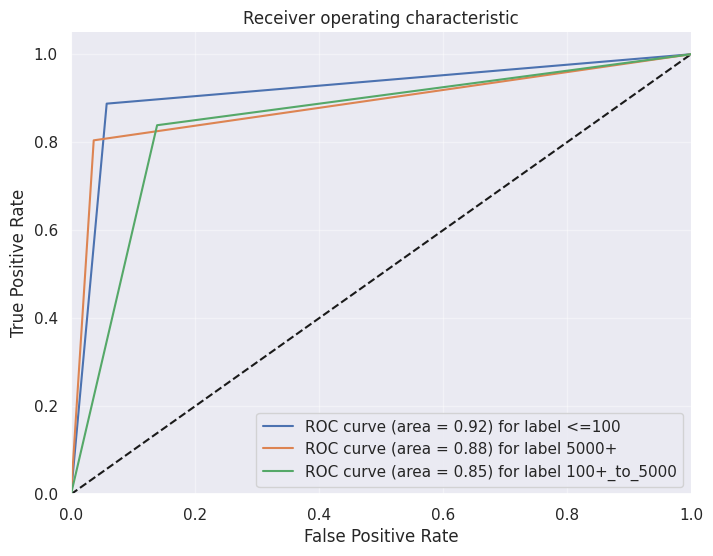

In [128]:
plot_multiclass_roc(y_test,best_dtc_pipe.predict(X_test))

### Random Forest

In [129]:
### Your code here
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_pipe = Pipeline(steps=[
    ('prep',ct),
    ('model', rfc)
])
rfc_pipe.fit(X_train,y_train)
rfc_pipe.score(X_test,y_test)

0.8270042194092827

In [130]:
param_grid = {
    'model__n_estimators' : [5,20,50,100],
    'model__criterion': ['gini','entropy'],
    'model__max_features': ['auto','sqrt','log2'],
}

rfc_grid = GridSearchCV(rfc_pipe,param_grid)
rfc_grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                   

In [131]:
### Your code here
print(rfc_grid.best_params_)
best_rfc_pipe = rfc_grid.best_estimator_
pred_data['RFC'] = model_stats(y_test,best_rfc_pipe.predict(X_test))

{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 100}
Accuracy Score 0.8649789029535865
Balanced Accuracy 0.8353146775306662
F1 Score 0.8649789029535865
              precision    recall  f1-score   support

100+_to_5000       0.80      0.88      0.84        93
       5000+       0.86      0.70      0.77        46
       <=100       0.94      0.93      0.93        98

    accuracy                           0.86       237
   macro avg       0.87      0.84      0.85       237
weighted avg       0.87      0.86      0.86       237



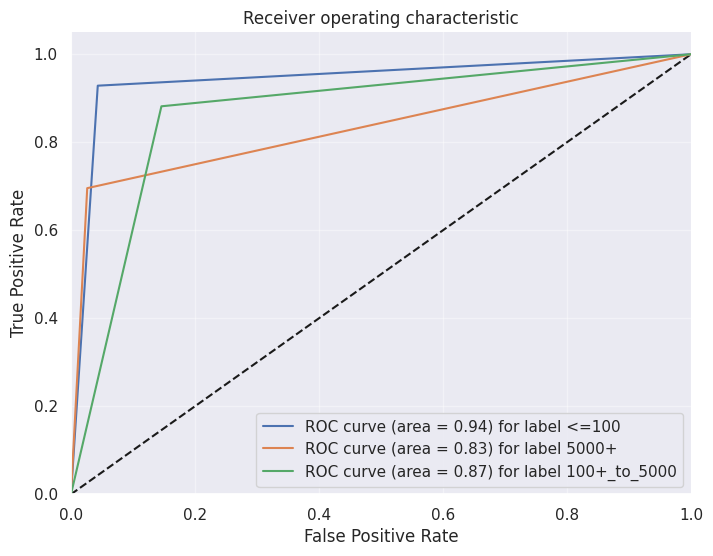

In [132]:
plot_multiclass_roc(y_test,best_rfc_pipe.predict(X_test))

### Gradient Boosting Classifier

In [133]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc_pipe = Pipeline(steps=[
    ('prep',ct),
    ('model', gbc)
])
gbc_pipe.fit(X_train,y_train)
gbc_pipe.score(X_test,y_test)

0.8860759493670886

In [134]:
param_grid = {
    'model__n_estimators': [90,100,110,120,130],
    'model__max_depth': [1,3,5,7]
}

gbc_grid = GridSearchCV(gbc_pipe,param_grid)
gbc_grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                   

In [135]:
### Your code here
print(gbc_grid.best_params_)
best_gbc_pipe = gbc_grid.best_estimator_
pred_data['GBC'] = model_stats(y_test,best_gbc_pipe.predict(X_test))

{'model__max_depth': 5, 'model__n_estimators': 130}
Accuracy Score 0.8818565400843882
Balanced Accuracy 0.871990217311796
F1 Score 0.8818565400843882
              precision    recall  f1-score   support

100+_to_5000       0.83      0.88      0.85        93
       5000+       0.84      0.83      0.84        46
       <=100       0.96      0.91      0.93        98

    accuracy                           0.88       237
   macro avg       0.88      0.87      0.87       237
weighted avg       0.88      0.88      0.88       237



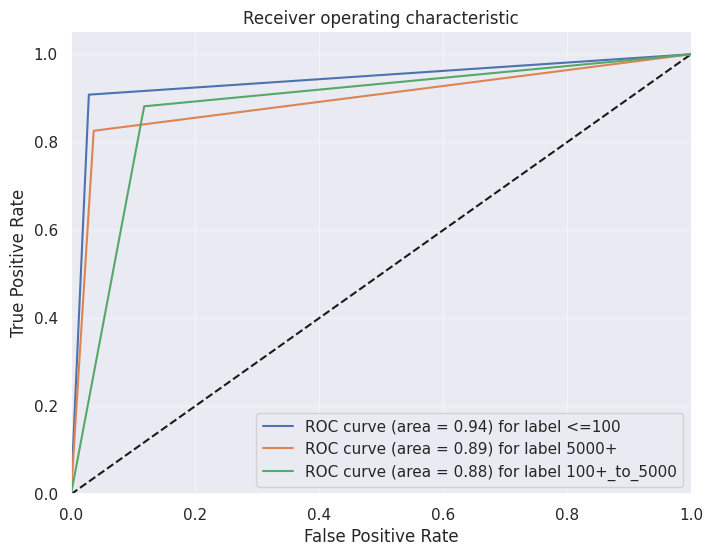

In [136]:
plot_multiclass_roc(y_test,best_gbc_pipe.predict(X_test))

### AdaBoost Classifier

In [137]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc_pipe = Pipeline(steps=[
    ('prep',ct),
    ('model', abc)
])
abc_pipe.fit(X_train,y_train)
abc_pipe.score(X_test,y_test)

0.6455696202531646

In [138]:
param_grid = {
    'model__n_estimators': [3,5,7,9,11,15],
    'model__learning_rate': [0.01,0.1],
    'model__algorithm': ['SAMME','SAMME.R']
}

abc_grid = GridSearchCV(abc_pipe,param_grid)
abc_grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                   

In [139]:
### Your code here
print(abc_grid.best_params_)
best_abc_pipe = abc_grid.best_estimator_
pred_data['ABC'] = model_stats(y_test,best_abc_pipe.predict(X_test))

{'model__algorithm': 'SAMME.R', 'model__learning_rate': 0.1, 'model__n_estimators': 3}
Accuracy Score 0.869198312236287
Balanced Accuracy 0.8616032668326797
F1 Score 0.869198312236287
              precision    recall  f1-score   support

100+_to_5000       0.81      0.87      0.84        93
       5000+       0.84      0.83      0.84        46
       <=100       0.95      0.89      0.92        98

    accuracy                           0.87       237
   macro avg       0.87      0.86      0.86       237
weighted avg       0.87      0.87      0.87       237



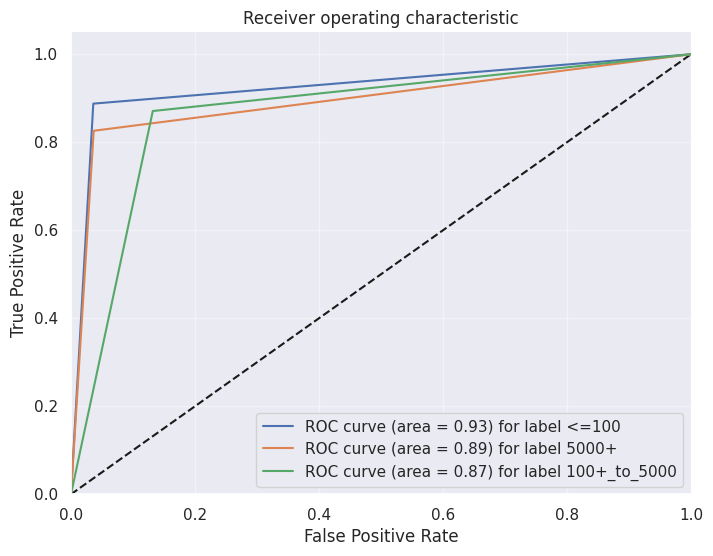

In [140]:
plot_multiclass_roc(y_test,best_abc_pipe.predict(X_test))

## Model Result Visualization

In [141]:
pred_data

{'LRC': {'Acc': 0.8818565400843882,
  'Bal_Acc': 0.8745551516539294,
  'f1': 0.8818565400843882},
 'knn': {'Acc': 0.6877637130801688,
  'Bal_Acc': 0.6483336672677487,
  'f1': 0.6877637130801688},
 'SVC': {'Acc': 0.8734177215189873,
  'Bal_Acc': 0.8606110045701311,
  'f1': 0.8734177215189873},
 'DTC': {'Acc': 0.8523206751054853,
  'Bal_Acc': 0.8436042018490427,
  'f1': 0.8523206751054853},
 'RFC': {'Acc': 0.8649789029535865,
  'Bal_Acc': 0.8353146775306662,
  'f1': 0.8649789029535865},
 'GBC': {'Acc': 0.8818565400843882,
  'Bal_Acc': 0.871990217311796,
  'f1': 0.8818565400843882},
 'ABC': {'Acc': 0.869198312236287,
  'Bal_Acc': 0.8616032668326797,
  'f1': 0.869198312236287}}

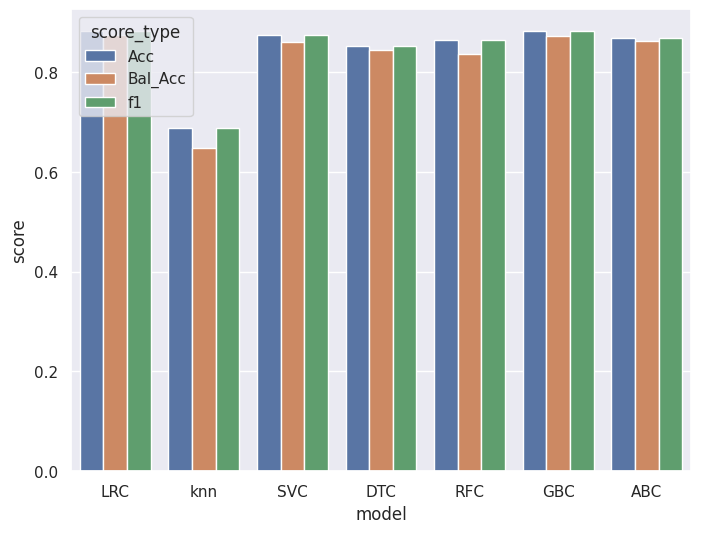

In [142]:
pred_df = pd.DataFrame(columns=['model','score_type','score'])
for mk,mv in pred_data.items():
    for sk,sv in pred_data[mk].items():
        pred_df.loc[len(pred_df)] = [mk,sk,sv]
        
sns.barplot(data=pred_df, x='model', y='score', hue='score_type')


From graph it is clear that Gradient Boosting Classifier is the best performing classifier on this dataset

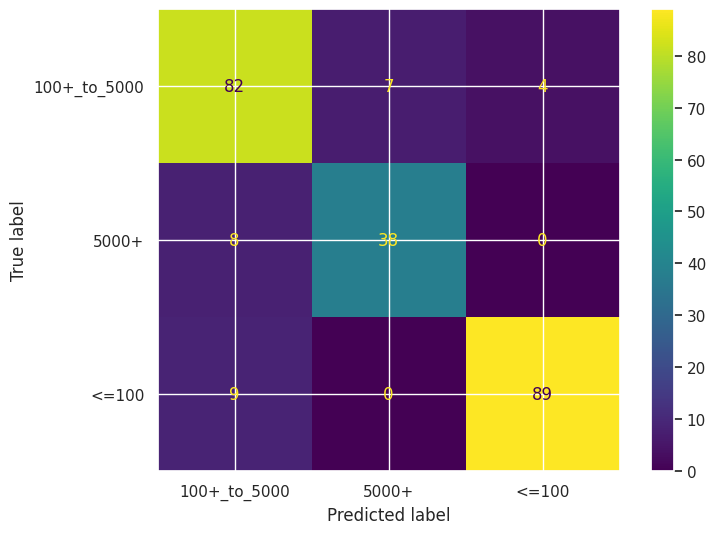

In [146]:
from sklearn.metrics import ConfusionMatrixDisplay,plot_confusion_matrix
plot_confusion_matrix(best_gbc_pipe,X_test,y_test)

## Saving the best model

In [151]:
import mlflow
mlflow.set_tracking_uri(workspace.get_mlflow_tracking_uri())
mlflow.set_experiment('summer_product_sale')
mlflow.autolog()

2022/12/18 14:38:26 INFO mlflow.tracking.fluent: Experiment with name 'summer_product_sale' does not exist. Creating a new experiment.
2022/12/18 14:38:26 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of statsmodels. If you encounter errors during autologging, try upgrading / downgrading statsmodels to a supported version, or try upgrading MLflow.
2022/12/18 14:38:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2022/12/18 14:38:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2022/12/18 14:38:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2022/12/18 14:38:29 INFO mlflow.pyspark.ml: No SparkSession detected. Autologging will log pyspark.ml models contained in the default allowlist. To specify a custom allowlist, initialize a SparkSession prior to calling mlflow.pyspark.ml.autolog() and specify the path to your allowlist file via the spark.mlflow.pysparkml.autolog.

In [152]:
fgbc = GradientBoostingClassifier(n_estimators=130, max_depth=5)
fgbc_pipe = Pipeline(steps=[
    ('prep',ct),
    ('model', fgbc)
])
with mlflow.start_run() as run:
    fgbc_pipe.fit(X_train,y_train)
    

2022/12/18 14:44:59 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('prep', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('simpleimputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                  ...`
2022/12/18 14:44:59 WARNING mlflow.utils: Truncated the value of the key `prep`. Truncated value: `ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('simpleimputer',
                      

In [153]:
model_uri = f"runs:/{run.info.run_id}/model"
model = mlflow.register_model(model_uri, 'summer_product_sale_model')

Successfully registered model 'summer_product_sale_model'.
2022/12/18 14:46:50 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: summer_product_sale_model, version 1
Created version '1' of model 'summer_product_sale_model'.


# Model Deployment

In [154]:
from azureml.core.environment import Environment
from azureml.core.conda_dependencies import CondaDependencies
from azureml.core.webservice import AciWebservice

In [155]:
env = Environment.get(
    workspace=workspace,
    name = "AzureML-sklearn-1.0-ubuntu20.04-py38-cpu",
    version=1
)
env.inferencing_stack_version = 'latest'

In [156]:
aciconfig = AciWebservice.deploy_configuration(
    cpu_cores=1,
    memory_gb=1,
    tags={"data":"summer sale",'method':'sklearn'},
    description="Classify Summer Sale"
)

In [192]:
import  uuid
from azureml.core.model import InferenceConfig
from azureml.core.environment import Environment
from azureml.core.model import Model

service_name = "summerproductsalegbc"+str(uuid.uuid4())[:4]
print(service_name)


summerproductsalegbc92ef


In [193]:
model = Model(workspace,'summer_product_sale_model')
inference_config = InferenceConfig(entry_script="score.py", environment=env)

In [174]:
import os
print(os.path.join(Model.get_model_path(model_name = 'summer_product_sale_model', version = 1, _workspace= workspace),'model.pkl'))
# print(os.getenv('AZUREML_MODEL_DIR'))
# model_path = os.path.join(os.getenv('AZUREML_MODEL_DIR'), 'summer_product_sale_model', 'summer_product_sale_model.pkl')

azureml-models/summer_product_sale_model/1/model/model.pkl


In [194]:
service = Model.deploy(
    workspace=workspace,
    name=service_name,
    models = [model],
    inference_config=inference_config,
    deployment_config=aciconfig
)
service.wait_for_deployment(show_output=True)

Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
Running
2022-12-19 10:01:51+00:00 Creating Container Registry if not exists.
2022-12-19 10:01:52+00:00 Registering the environment.
2022-12-19 10:01:52+00:00 Use the existing image.
2022-12-19 10:01:54+00:00 Submitting deployment to compute.
2022-12-19 10:01:58+00:00 Checking the status of deployment summerproductsalegbc92ef..
2022-12-19 10:04:01+00:00 Checking the status of inference endpoint summerproductsalegbc92ef.
Succeeded
ACI service creation operation finished, operation "Succeeded"


In [186]:
X_test.iloc[0], y_test.iloc[0]

(price                                     11
 retail_price                              22
 uses_ad_boosts                             1
 rating                                  2.71
 rating_count                              24
 badges_count                               2
 product_color                          black
 product_variation_size_id              Other
 shipping_option_price                      2
 shipping_is_express                        0
 countries_shipped_to                      43
 has_urgency_banner                         0
 origin_country                            CN
 merchant_title                  AlicaDubecka
 merchant_rating_count                    746
 merchant_rating                      4.01877
 merchant_has_profile_picture               0
 Name: 318, dtype: object,
 '<=100')